# Dell Assessment

In [1]:
import pandas as pd
import numpy as np
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import warnings
# Suppressing the warnings
warnings.simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)



#  Data Exploration and Cleaning

In [2]:
# loading the data 
original_data = pd.read_csv('Dell_ADSE_DS_DE_MLE_dataset.csv')
original_data.head()

,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
0,0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [3]:
# Overview of the data
original_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   asst_id              100000 non-null  int64  
 1   product_type         99980 non-null   object 
 2   mnfture_wk           100000 non-null  int64  
 3   contract_st          100000 non-null  int64  
 4   contract_end         100000 non-null  int64  
 5   contact_wk           100000 non-null  int64  
 6   contact_type         99986 non-null   object 
 7   issue_type           85958 non-null   object 
 8   topic_category       66916 non-null   object 
 9   parts_sent           54566 non-null   object 
 10  repair_type          100000 non-null  object 
 11  repeat_ct            100000 non-null  int64  
 12  parts_ct             100000 non-null  int64  
 13  agent_tenure_indays  99986 non-null   float64
 14  contact_manager_flg  100000 non-null  int64  
 15  diagnostics       

In [4]:
# Summary statistics for numerical columns
rsm.describe(original_data)
# df.describe()

No description attribute available


,asst_id,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.00000,99986.000000,100000.000000
mean,35702.117890,201672.108910,201671.595910,201951.897740,201840.0,0.074090,1.15955,985.886844,0.012430
std,25038.092288,156.139692,158.940598,186.777325,0.0,0.262491,1.56942,862.044503,0.110795
min,0.000000,201001.000000,200547.000000,201006.000000,201840.0,0.000000,0.00000,218.000000,0.000000
25%,12382.750000,201612.000000,201612.000000,201903.000000,201840.0,0.000000,0.00000,536.000000,0.000000
50%,32898.500000,201719.000000,201720.000000,201938.000000,201840.0,0.000000,1.00000,801.000000,0.000000
75%,57701.250000,201808.000000,201809.000000,202045.000000,201840.0,0.000000,2.00000,1018.000000,0.000000
max,82441.000000,201927.000000,202630.000000,202953.000000,201840.0,3.000000,51.00000,8922.000000,1.000000


In [5]:
# Count of missing values in each column
missing_values = original_data.isnull().sum()
missing_values


asst_id                    0
product_type              20
mnfture_wk                 0
contract_st                0
contract_end               0
contact_wk                 0
contact_type              14
issue_type             14042
topic_category         33084
parts_sent             45434
repair_type                0
repeat_ct                  0
parts_ct                   0
agent_tenure_indays       14
contact_manager_flg        0
diagnostics                0
repeat_parts_sent      86654
region                     3
country                10002
dtype: int64

In [6]:
# Checking for duplicates
duplicates = original_data.duplicated().sum()
duplicates

13464

In [7]:
# Displaying some of the duplicate rows for review
duplicate_rows = original_data[original_data.duplicated(keep=False)].sort_values(by="asst_id")
duplicate_rows.head(10)  # Displaying the first 10 rows of duplicates for review


,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
1,1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
83183,1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
83184,2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
2,2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
83185,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
83186,4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
5,5,Laptops,201137,201137,201237,201840,VOICE,Fee Based Support,General Queries,NaN,Soft,0,0,802.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
83187,5,Laptops,201137,201137,201237,201840,VOICE,Fee Based Support,General Queries,NaN,Soft,0,0,802.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


- Since these values are exactly same it is safe to drop these rows 

In [8]:

# Removing duplicate rows
df = original_data.drop_duplicates()
# Checking the shape of the cleaned dataset to confirm the removal
df.shape[0]


86536

### Dealing with missing values

#### Product type


In [9]:
# Filling missing values with a new category called "Not Specified". 
df['product_type'].fillna('Not Specified', inplace=True)
print(df['product_type'].value_counts(dropna=False))


product_type
Laptops              63153
Desktops             20461
Other Electronics     2902
Not Specified           20
Name: count, dtype: int64


#### Contact type

In [10]:
print(df['contact_type'].value_counts(dropna=False))


contact_type
VOICE      60360
CHAT       12478
Voice      12465
EMAIL       1124
Unknown       99
NaN           10
Name: count, dtype: int64


In [11]:
# Dealing with case sensitivity and combining Nan and unknown together
df['contact_type'] = df['contact_type'].str.upper()
df['contact_type'].fillna('UNKNOWN', inplace=True)
print(df['contact_type'].value_counts(dropna=False))


contact_type
VOICE      72825
CHAT       12478
EMAIL       1124
UNKNOWN      109
Name: count, dtype: int64


#### Issue type 

In [12]:
print(df['issue_type'].value_counts(dropna=False))


issue_type
NaN                         12162
System Board Components     11310
Fee Based Support            8829
Operating System             8420
Hard Drive                   7355
                            ...  
EQL - Hardware                  2
MWD                             1
Compellent - Hardware           1
Try & Buy                       1
Lost / Stolen in Transit        1
Name: count, Length: 83, dtype: int64


- `issue_type` column has a lot of NaN values. I have  decided to fill them with the placeholder value `Unknown`. This makes sense since not every customer might be able to identify the exact issue or the issue might be unspecified.

In [13]:
df['issue_type'].fillna('Unknown', inplace=True)
#df['topic_category'].fillna('Unknown', inplace=True)



#### Topic category

In [14]:
print(df['topic_category'].value_counts(dropna=False))

topic_category
NaN                     28621
Booting                 13240
LCD/Monitor              4679
Call Logs                4190
General Queries          3614
                        ...  
Firmware                    5
Sim Card                    4
Vmware                      2
System Configuration        2
Miracast                    1
Name: count, Length: 64, dtype: int64


In [15]:
# Finding the most common issue_type for each topic_category
common_issues = df.groupby('topic_category')['issue_type'].apply(lambda x: x.mode()[0])
print(common_issues)


topic_category
AC Adaptor                      Power Subsystem / Cables / AC Adapter
Antivirus                               Security / Antivirus Software
App/Software                                        Fee Based Support
Audio Device                         Audio, Video, Speakers, TV Tuner
BIOS                                          System Board Components
                                                ...                  
Touchscreen                          Audio, Video, Speakers, TV Tuner
USB                                           System Board Components
Virus/Adware/Malware/Spyware                        Fee Based Support
Vmware                                             Information Status
Webcam                                          Input Device / Webcam
Name: issue_type, Length: 63, dtype: object


In [17]:
# the most common topic_category for each issue_type
common_topics = df.groupby('issue_type')['topic_category'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "Not specified")
# Setting 'topic_category' as 'Unknown' only where 'issue_type' is 'Unknown' and 'topic_category' is NaN
print(common_topics)


issue_type
Adobe                                       App/Software
Audio, Video, Speakers, TV Tuner             LCD/Monitor
Backplane                                        Booting
Backup / Archive / Data Management               Booting
Backup / Recovery Software                       Booting
                                             ...        
Systems Management                               Booting
Tape Drive or Library                            Booting
Try & Buy                                  Not specified
Unknown                                          Booting
Wrong Solution / Product Sold         Incorrect Shipment
Name: topic_category, Length: 83, dtype: object


- Creating a Series that maps each `issue_type` to its most common `topic_category` using the `common_topics` mapping.


In [18]:
# Filling NaN values in topic_category using the mapping from issue_type
df['topic_category'] = df['topic_category'].fillna(df['issue_type'].map(common_topics))
print(df['topic_category'].value_counts(dropna=False))


topic_category
Booting                 32896
LCD/Monitor              6433
General Queries          5165
Call Logs                4736
Hard Drive               4032
                        ...  
Firmware                    5
Sim Card                    4
Vmware                      2
System Configuration        2
Miracast                    1
Name: count, Length: 64, dtype: int64


In [19]:
print(df['topic_category'].isna().sum())


0


#### Parts Sent

In [20]:
print(df['parts_sent'].value_counts(dropna=False))


parts_sent
NaN                                                              39339
Hard Drive                                                        3873
Motherboard, Documentation                                        3761
LCD Panel                                                         2589
Keyboard                                                          2576
                                                                 ...  
Speaker, Motherboard, Keyboard, Documentation                        1
PCBA - Misc.(2), Motherboard, Chassis, Cables                        1
Miscellaneous(2), Chassis(2), Cables, Adapter, AC                    1
Motherboard(2), Miscellaneous, Documentation                         1
Motherboard, Miscellaneous(2), Heatsink, Fan Assembly, Cables        1
Name: count, Length: 2942, dtype: int64


##### Hypothesis
- Assuming if there's no entry in the `parts_sent` column, it could very well indicate that no parts were sent to the customer. 
- This is especially plausible if the nature of the issue didn't require a physical part replacement or if troubleshooting resolved the issue without the need for sending out parts.

##### To support this hypothesis Cross-referencing with `repair_type` column. 
- For example, if there's a column that indicates the problem was resolved without hardware intervention or if the `repair_type` suggests a software fix, then that supports the idea that no parts were needed.

In [21]:
# Checking unique values of repair type
print(df['repair_type'].value_counts())


repair_type
Hard    51500
Soft    35036
Name: count, dtype: int64


In [22]:
# parts sent for "Soft" repairs
print(df[df['repair_type'] == 'Soft']['parts_sent'].value_counts(dropna=False).head())


parts_sent
NaN    35036
Name: count, dtype: int64


In [23]:
# parts sent for "Hard" repairs
print(df[df['repair_type'] == 'Hard']['parts_sent'].value_counts(dropna=False).head())


parts_sent
NaN                           4303
Hard Drive                    3873
Motherboard, Documentation    3761
LCD Panel                     2589
Keyboard                      2576
Name: count, dtype: int64


- This reinforces the hypothesis that for `Soft` repairs, no parts are typically required (since it might be software or configuration issues). Hence, the NaN values in the parts_sent column can be interpreted as  `No Parts Sent` specifically for `Soft` repairs.

##### For `Hard` repairs, there are still 4303 instances where no parts are specified. This could be due to various reasons:

- Maybe the repair required an onsite visit without replacing parts.
- It could be a data entry error.
- Some other procedural reasons.

In [24]:
# Replacing NaN for Soft repairs
df.loc[df['repair_type'] == 'Soft', 'parts_sent'] = df.loc[df['repair_type'] == 'Soft', 'parts_sent'].fillna('No Parts Sent')

# Replacing NaN for Hard repairs
df.loc[df['repair_type'] == 'Hard', 'parts_sent'] = df.loc[df['repair_type'] == 'Hard', 'parts_sent'].fillna('Not Specified')


####  Agent tenure in days

In [25]:
# since there are only 14 missing values using simple imputation with central tendency
median_tenure = df['agent_tenure_indays'].median()
df['agent_tenure_indays'].fillna(median_tenure, inplace=True)


#### Repeat parts sent

In [26]:
print(df['repeat_parts_sent'].value_counts(dropna=False))

repeat_parts_sent
NaN                                                                               74973
Motherboard, Documentation                                                          939
Motherboard                                                                         575
LCD Panel                                                                           565
Chassis                                                                             514
                                                                                  ...  
Motherboard, Mechanical Hardware, LCD Panel, Documentation, Chassis(2), Cables        1
Operating System, Mechanical Hardware, Keyboard                                       1
PCBA - Misc., Motherboard, LCD Panel, Heatsink, Documentation                         1
Miscellaneous, Keyboard, Heatsink, Hard Drive, Fan Assembly                           1
Mouse, LCD Panel, Hard Drive, Chassis, Cables(2)                                      1
Name: count, L

There are a lot of missing (NaN) values in the `repeat_parts_sent` column. This means that for a large number of cases, no parts were sent on a repeat visit. This can be indicative of one of two scenarios:

- There was no repeat visit required, hence no parts were sent.
- There was a repeat visit, but no parts were sent during the repeat.

In [27]:
# For rows where Repeat_ct is 0 and repeat_parts_sent is NaN
df.loc[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'].isnull()), 'repeat_parts_sent'] = 'No Repeat Visit'
# Checking null values
print(df['repeat_parts_sent'].isna().sum()) 


156


In [28]:
# For rows where Repeat_ct is greater than 0 and repeat_parts_sent is NaN
df.loc[(df['repeat_ct'] > 0) & (df['repeat_parts_sent'].isnull()), 'repeat_parts_sent'] = 'No Parts Sent on Repeat'
# Checking null values
print(df['repeat_parts_sent'].isna().sum()) 

0


##### There are few cases where there were no additional visits but parts sent on additional visit have values
- Marking this as one of the anomalies, need to do further analysis to understand the pattern


In [29]:
# Number of entries where Repeat_ct is 0 but repeat_parts_sent is not NaN
anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent']!='No Repeat Visit')]
print(len(anomalies))


5293



- Analyzed columns `repeat_parts_sent` and `repeat_ct` from the dataset.
- Definitions:
  - `repeat_parts_sent`: Parts sent on additional visits.
  - `repeat_ct`: Number of additional visits required post the initial one.
- Identified inconsistency:
  - 5293 entries where `repeat_ct` is 0 but `repeat_parts_sent` has values.
- Potential implications:
  - Data collection or input error.
  - Preemptive parts sent to customers without an additional visit.
  - Misinterpretation or misuse of the `repeat_ct` field.
- Potential Business Insights: 
  - The fact that parts were sent without additional visits might indicate an attempt to solve issues without in-person visits. This can be seen as a cost-saving measure or a customer convenience strategy. However, whether it's effective or not will depend on the broader context, which can be investigated further.


### Region and Country

In [30]:
# using crosstab to check the number of occurrences of each combination of Country and Region 
cross_tab = pd.crosstab(df['country'], df['region'])
print(cross_tab)


region             Hogwarts  Middle Earth  Milky Way
country                                             
Acrux                     0             0         13
Alcor                     0             0          4
Aldebaran                 0             0          3
Altair                    0             0          3
Antares                   0             0         21
Arcturus                  0             0         19
Becrux                    0             0         24
Bellatrix                 0             0          1
Betelgeuse                0             0          1
Bree                      0             2          0
Canopus                   0             0         11
Capella                   0             0         15
Castor                    0             0          6
Diagon Alley              3             0          0
Erebor                    0             3          0
Fangorn                   0            13          0
Fomalhaut                 0             0     

- There is no one to one relationship between `country` and `region`
- There is no other column that provides location and can't use external knowledge as the data is made up
- Computing most dominant country for each region and vice versa
- Filling missing countries using the dominant country for each region and vice vera

In [31]:
# For missing countries based on region
region_to_dom_country = df.dropna().groupby('region')['country'].apply(lambda x: x.mode().iloc[0])
df['country'] = df['country'].fillna(df['region'].map(region_to_dom_country))

# For missing regions based on country
country_to_dom_region = df.dropna().groupby('country')['region'].apply(lambda x: x.mode().iloc[0])
df['region'] = df['region'].fillna(df['country'].map(country_to_dom_region))


In [32]:
# Checking Nan
df[['region', 'country']].isna().sum()



region     3
country    3
dtype: int64

- Since there are only three values with Nan, dropping these rows would be the best choice
- Replacing them with unknown for now as other columns might have important information


In [33]:
df['country'].fillna('Unknown', inplace=True)
df['region'].fillna('Unknown', inplace=True)

In [34]:
# Ensuring all the missing values are dealt with
df.isnull().sum()

asst_id                0
product_type           0
mnfture_wk             0
contract_st            0
contract_end           0
contact_wk             0
contact_type           0
issue_type             0
topic_category         0
parts_sent             0
repair_type            0
repeat_ct              0
parts_ct               0
agent_tenure_indays    0
contact_manager_flg    0
diagnostics            0
repeat_parts_sent      0
region                 0
country                0
dtype: int64

## Exploratory Data Analysis

### Visualizing the data to detect outliers 

In [35]:
#numerical_cols = ['mnfture_wk', 'contract_st', 'contract_end', 'contact_wk', 'repeat_ct', 'parts_ct', 'agent_tenure_indays']
#rsm.distr_plot(df[numerical_cols])

In [36]:
# Suppressing all future warnings for a cleaner output
warnings.simplefilter(action='ignore', category=FutureWarning)


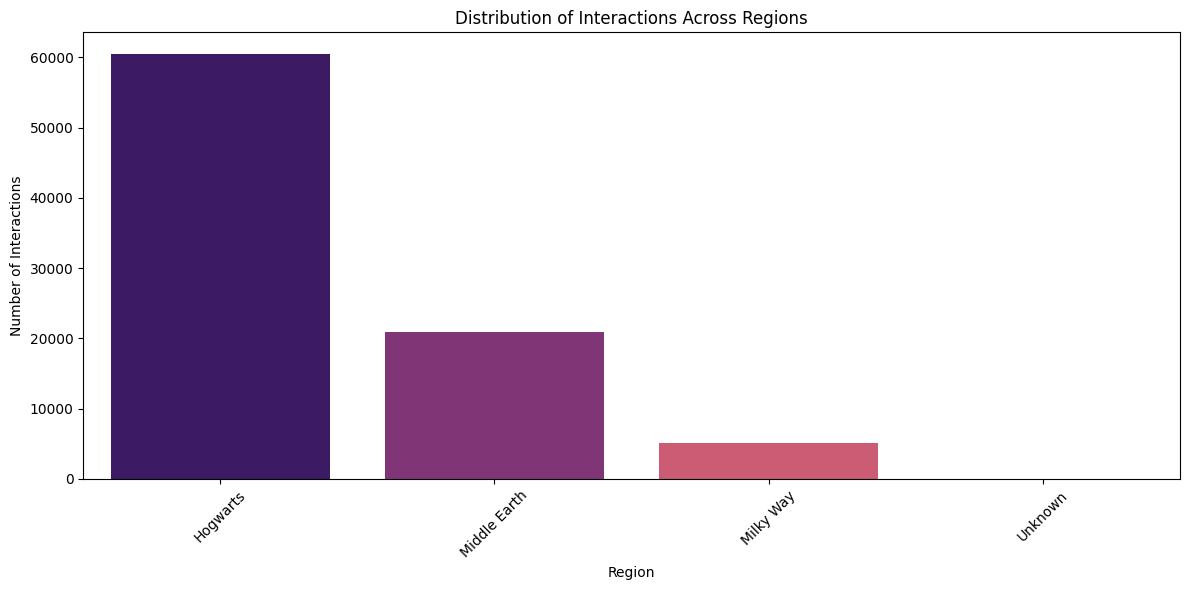

In [37]:
# Distribution of issues across regions
plt.figure(figsize=(12, 6))
region_counts = df['region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="magma")
plt.title('Distribution of Interactions Across Regions')
plt.ylabel('Number of Interactions')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- It appears that "Laptops" dominate the interactions, followed by "Desktops" and "Other" product types.

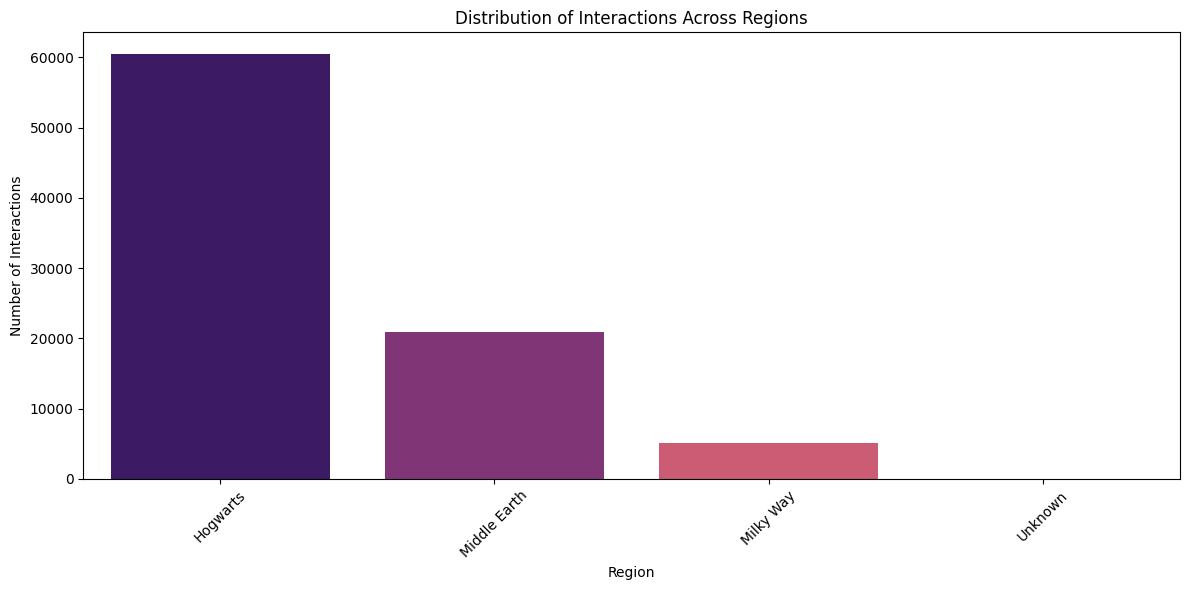

In [38]:
# Distribution of issues across regions
plt.figure(figsize=(12, 6))
region_counts = df['region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values, palette="magma")
plt.title('Distribution of Interactions Across Regions')
plt.ylabel('Number of Interactions')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- "Hogwarts" has the highest number of interactions, followed by "Middle Earth" and "Milkyway".

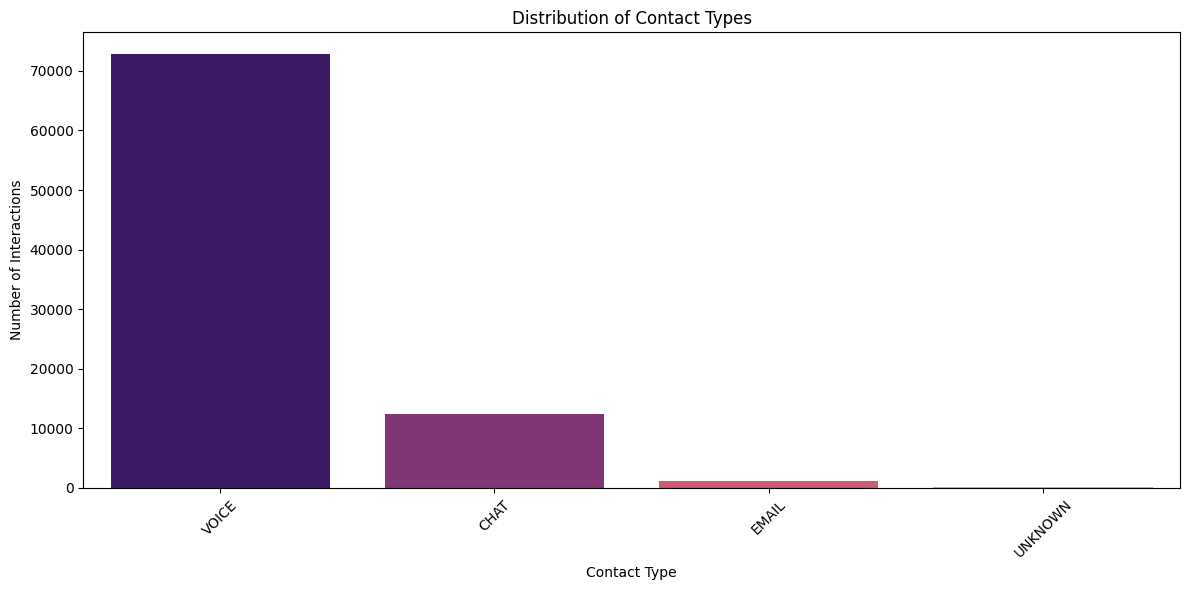

In [39]:
# Distribution of contact types
plt.figure(figsize=(12, 6))
contact_type_counts = df['contact_type'].value_counts()
sns.barplot(x=contact_type_counts.index, y=contact_type_counts.values, palette="magma")
plt.title('Distribution of Contact Types')
plt.ylabel('Number of Interactions')
plt.xlabel('Contact Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- "Voice" is the predominant method of contact, followed by "Chat" and "Email."

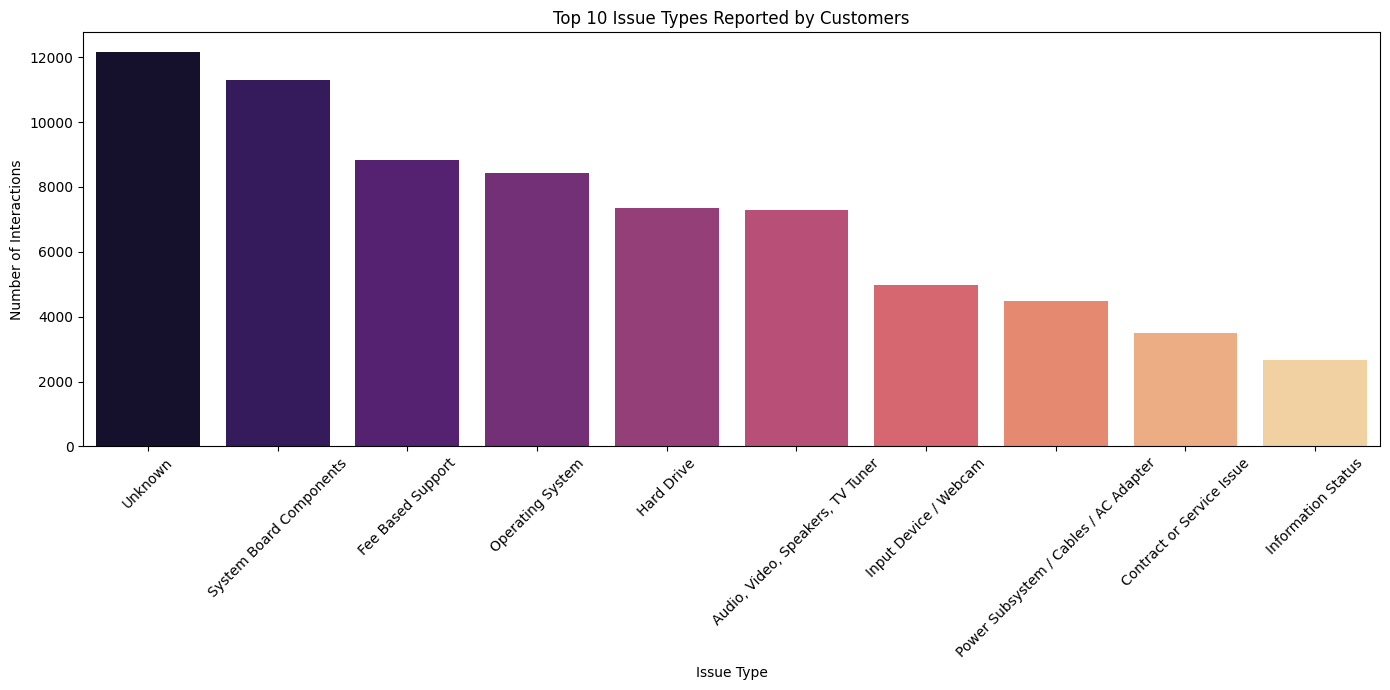

In [40]:
# Distribution of issue types (top 10 for better visualization)
plt.figure(figsize=(14, 7))
issue_type_counts = df['issue_type'].value_counts().head(10)
sns.barplot(x=issue_type_counts.index, y=issue_type_counts.values, palette="magma")
plt.title('Top 10 Issue Types Reported by Customers')
plt.ylabel('Number of Interactions')
plt.xlabel('Issue Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"Unknown" appears to be the most frequent, indicating that there are many interactions where the specific issue wasn't identified or recorded. Among the known issues, "System Board Components" and "Fee Based Support" are the most commonly reported.

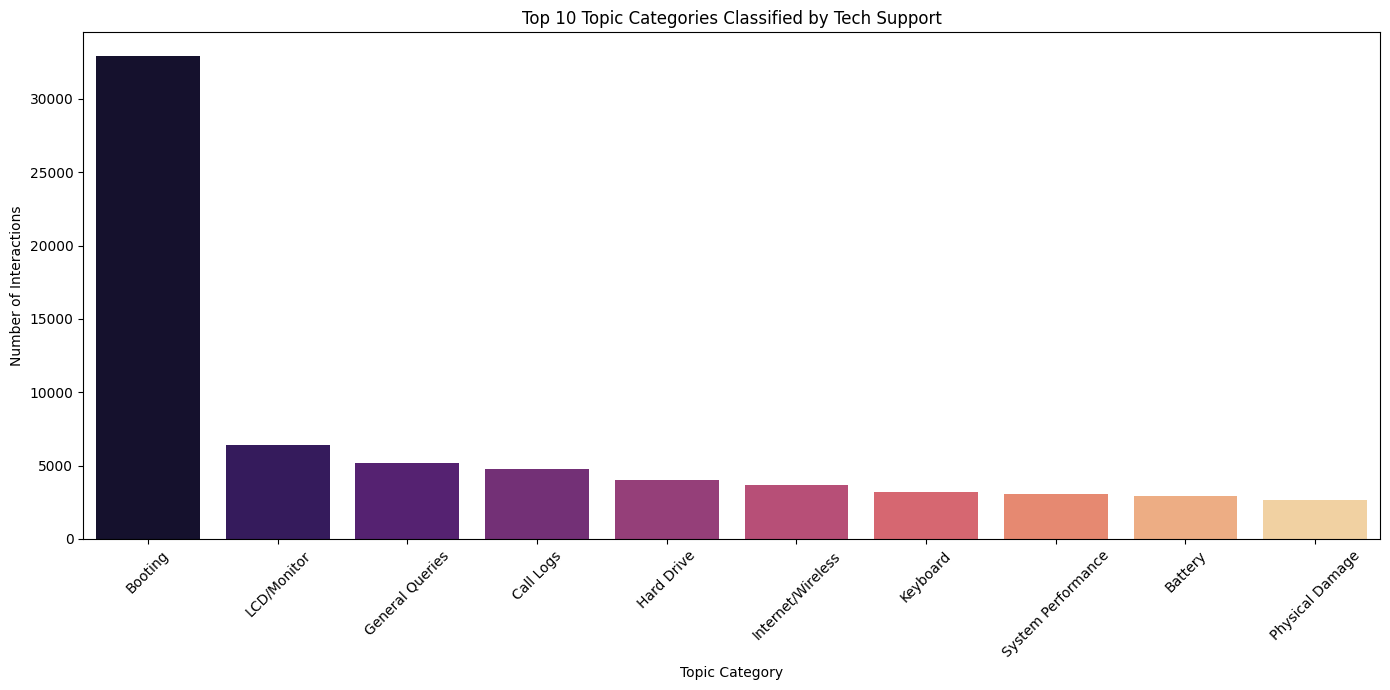

In [41]:
# Distribution of topic categories (top 10 for clarity)
plt.figure(figsize=(14, 7))
topic_category_counts = df['topic_category'].value_counts().head(10)
sns.barplot(x=topic_category_counts.index, y=topic_category_counts.values, palette="magma")
plt.title('Top 10 Topic Categories Classified by Tech Support')
plt.ylabel('Number of Interactions')
plt.xlabel('Topic Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Top 10 topic categories as classified by tech support agents. Similar to the issue types, "Unknown" is one of the most frequent, indicating many interactions where the topic wasn't identified or recorded. Among the known categories, "Booting" and "LCD/Monitor" are the most frequently classified topics.

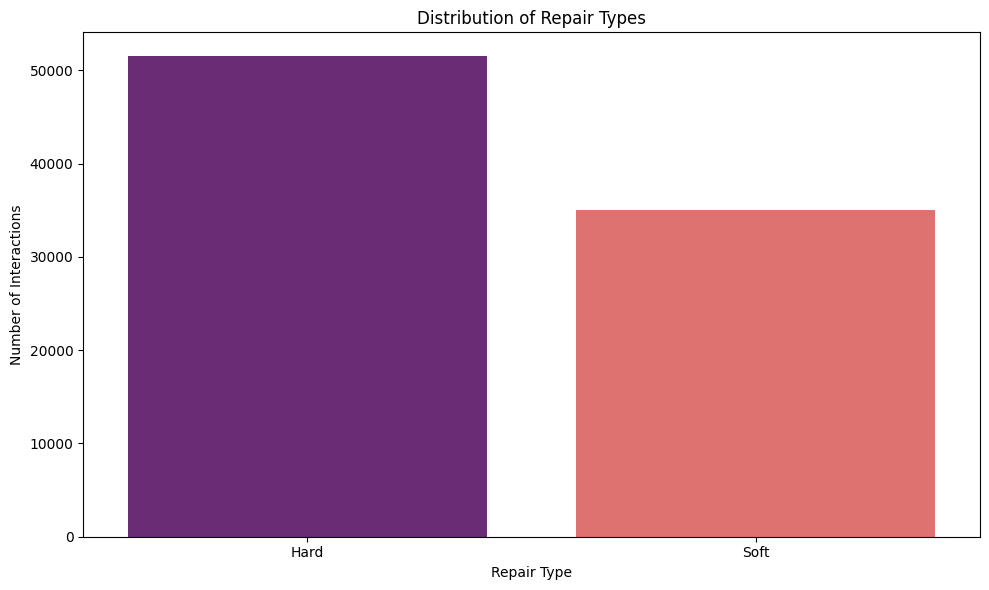

In [42]:
# Distribution of repair types
plt.figure(figsize=(10, 6))
repair_type_counts = df['repair_type'].value_counts()
sns.barplot(x=repair_type_counts.index, y=repair_type_counts.values, palette="magma")
plt.title('Distribution of Repair Types')
plt.ylabel('Number of Interactions')
plt.xlabel('Repair Type')
plt.tight_layout()
plt.show()


- The majority of interactions involve "Hard" repairs, indicating that physical parts often need to be replaced or repaired. "Soft" repairs are less frequent and pertain to software or configuration-related issues that don't require physical part replacements.

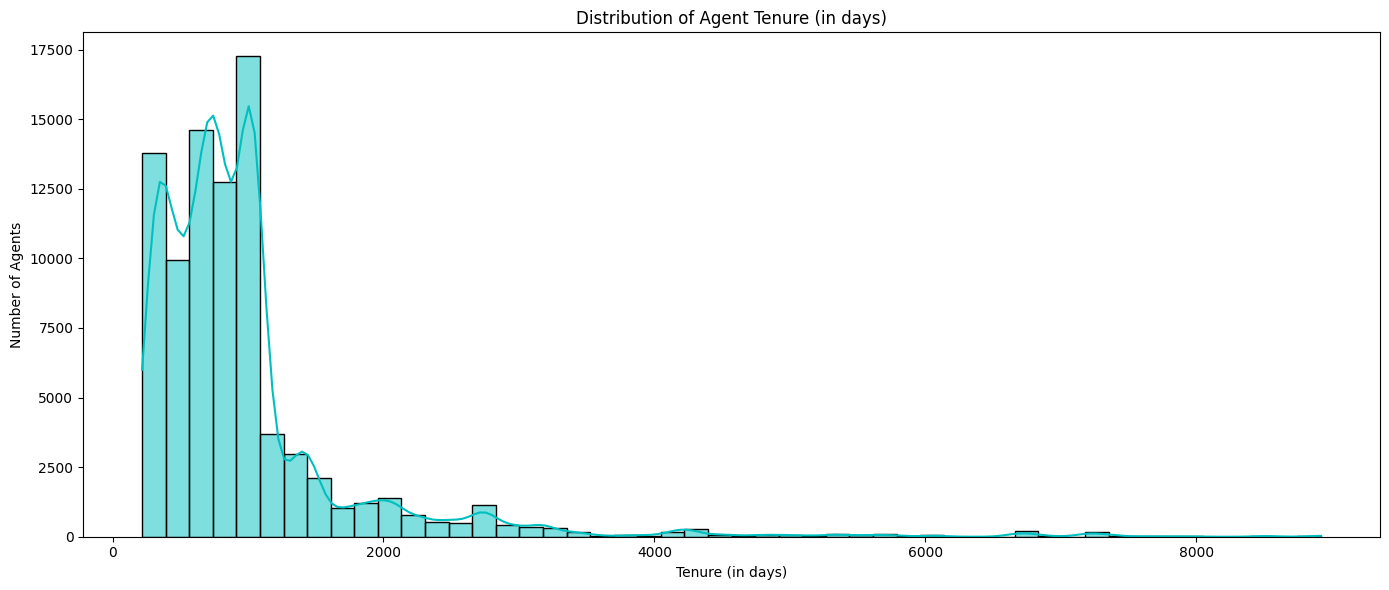

In [43]:
# Distribution of agent tenure
plt.figure(figsize=(14, 6))
sns.histplot(df['agent_tenure_indays'], bins=50, color="c", kde=True)
plt.title('Distribution of Agent Tenure (in days)')
plt.ylabel('Number of Agents')
plt.xlabel('Tenure (in days)')
plt.tight_layout()
plt.show()


-  Most agents have a tenure of around 1,000 days, with a few having a significantly longer tenure.

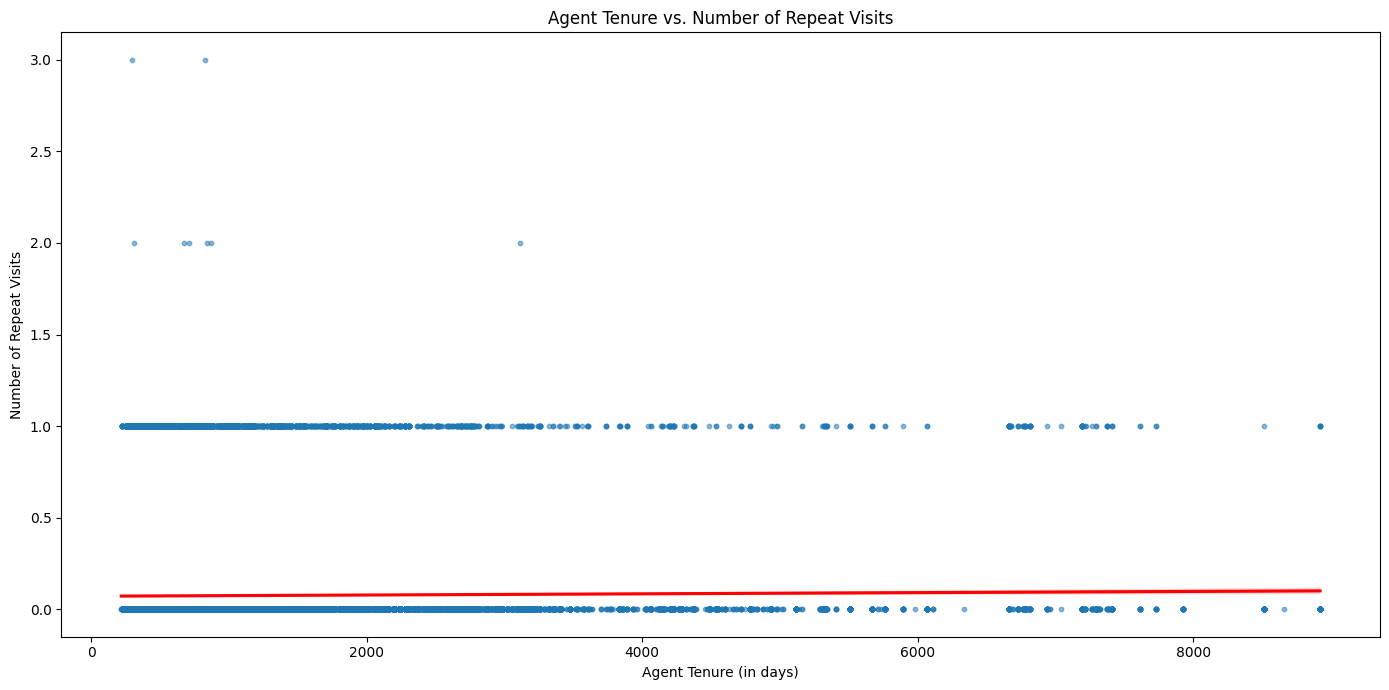

In [44]:
# correlation between agent tenure and the number of repeat visits required to fix an issue
# Scatter plot of agent tenure vs repeat visits with regression line
plt.figure(figsize=(14, 7))
sns.regplot(x=df['agent_tenure_indays'], y=df['repeat_ct'], scatter_kws={'s':10, 'alpha':0.5}, line_kws={"color":"red"})
plt.title('Agent Tenure vs. Number of Repeat Visits')
plt.ylabel('Number of Repeat Visits')
plt.xlabel('Agent Tenure (in days)')
plt.tight_layout()
plt.show()

- The scatter plot with a regression line shows the relationship between agent tenure (in days) and the number of repeat visits required to resolve an issue. Although the trend is not very pronounced, the regression line indicates a slight decrease in the number of repeat visits as agent tenure increases. This suggests that more experienced agents might be slightly more efficient in resolving issues on the first attempt, although the effect is not very strong.

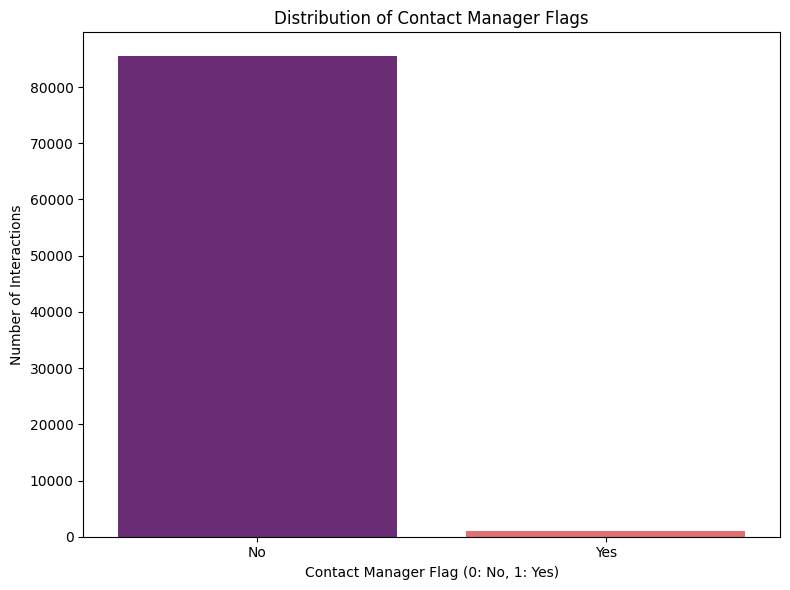

In [45]:
# Distribution of contact manager flags
plt.figure(figsize=(8, 6))
contact_manager_counts = df['contact_manager_flg'].value_counts()
sns.barplot(x=contact_manager_counts.index, y=contact_manager_counts.values, palette="magma")
plt.title('Distribution of Contact Manager Flags')
plt.ylabel('Number of Interactions')
plt.xlabel('Contact Manager Flag (0: No, 1: Yes)')
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.tight_layout()
plt.show()


- The vast majority of interactions do not require the involvement of a manager, indicating that most issues are resolved by the tech support agents themselves. Only a small fraction of interactions involve a manager.

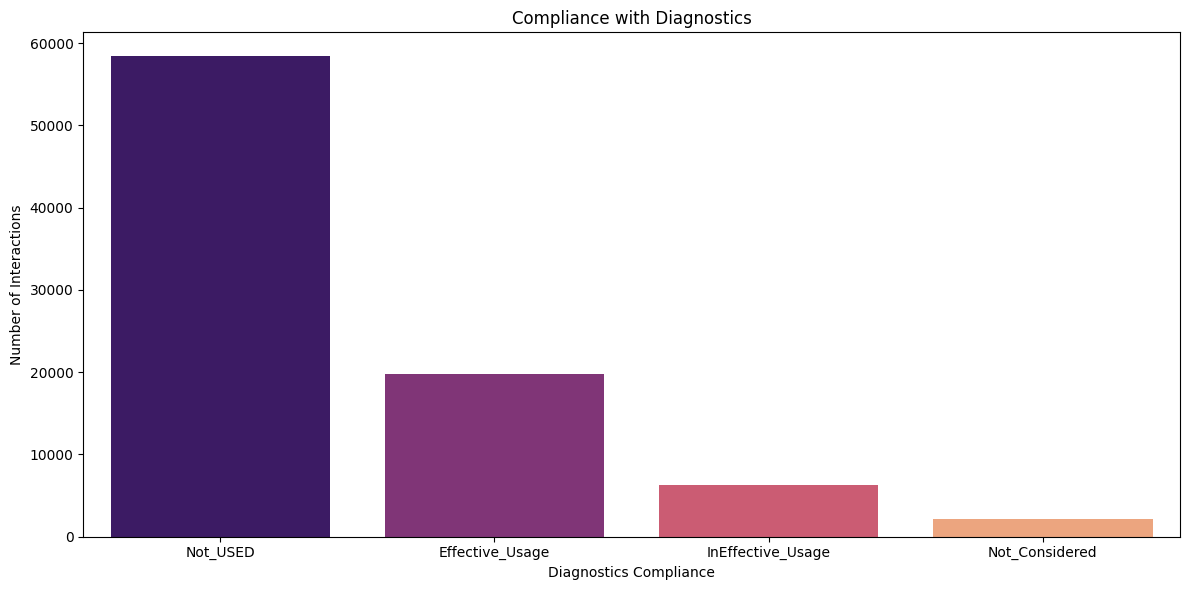

In [46]:
# Distribution of diagnostics compliance
plt.figure(figsize=(12, 6))
diagnostics_counts = df['diagnostics'].value_counts()
sns.barplot(x=diagnostics_counts.index, y=diagnostics_counts.values, palette="magma")
plt.title('Compliance with Diagnostics')
plt.ylabel('Number of Interactions')
plt.xlabel('Diagnostics Compliance')
plt.tight_layout()
plt.show()


- The majority of agents seem to be non-compliant with diagnostic usage, with "Not_USED" being the dominant category.

### Exploading data set

In [47]:
def process_and_explode(column):
    # Splitting the entries and exploding them into separate rows
    parts_df = column.str.split(', ').explode().str.strip()
    
    # Splitting each entry on '(' to separate part and count
    parts_df = parts_df.str.extract(r'(?P<part>.*?)(?:\((?P<count>\d+)\))?$')
    
    # Converting count to integer and replacing NaNs with 1 (since a missing count implies 1)
    parts_df['count'] = parts_df['count'].fillna(1).astype(int)
    
    return parts_df

# Applying the function for parts_sent and repeat_parts_sent
df_parts_sent = process_and_explode(df['parts_sent'])
df_repeat_parts_sent = process_and_explode(df['repeat_parts_sent'])




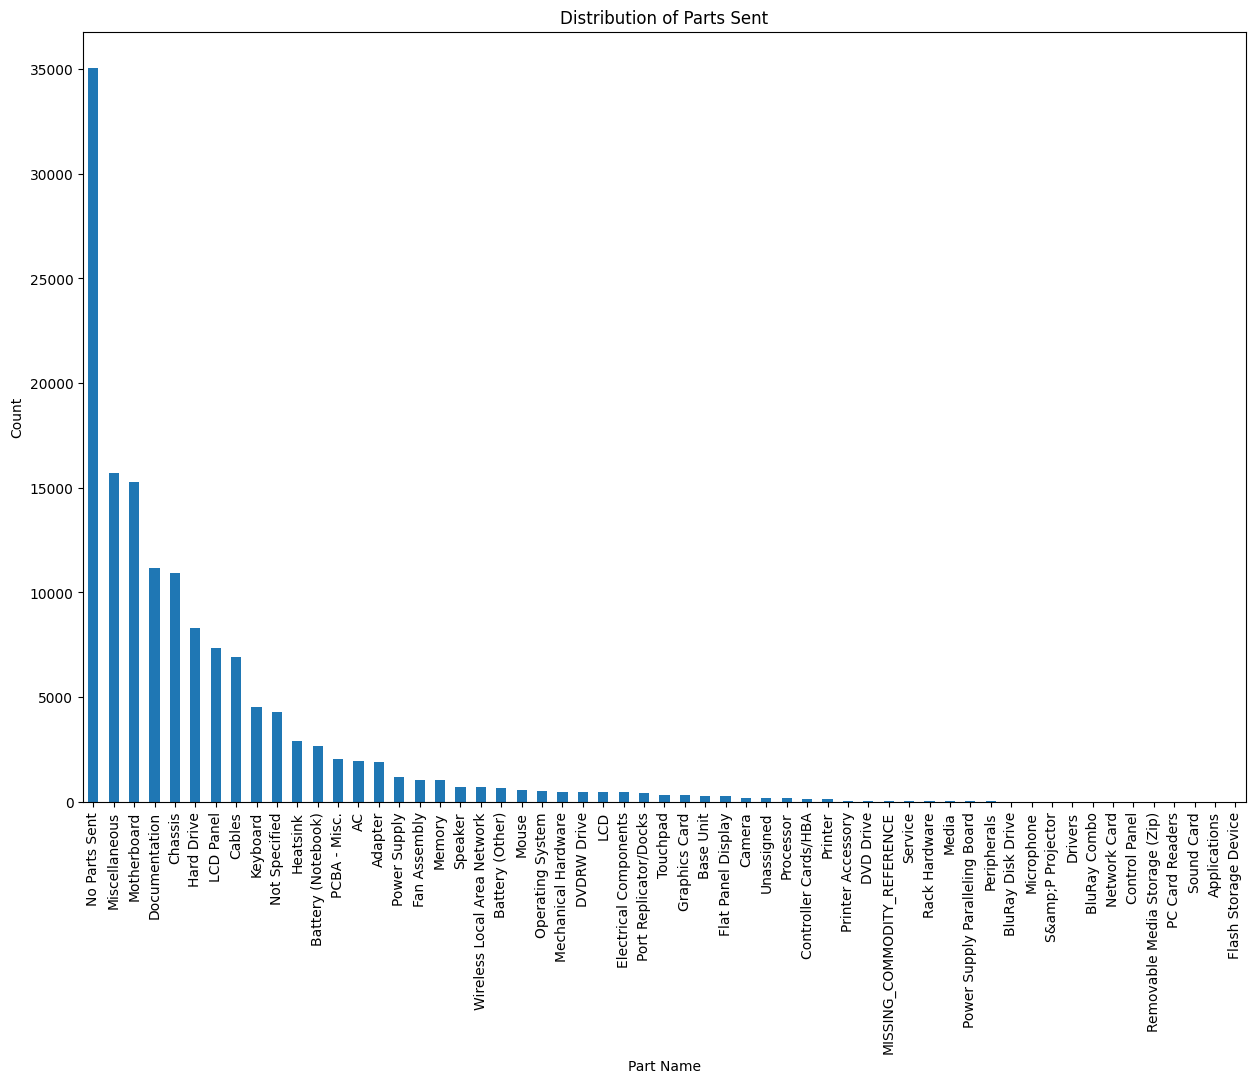

In [48]:
part_counts = df_parts_sent.groupby('part')['count'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 10))
part_counts.plot(kind='bar')
plt.title('Distribution of Parts Sent')
plt.ylabel('Count')
plt.xlabel('Part Name')
plt.show()

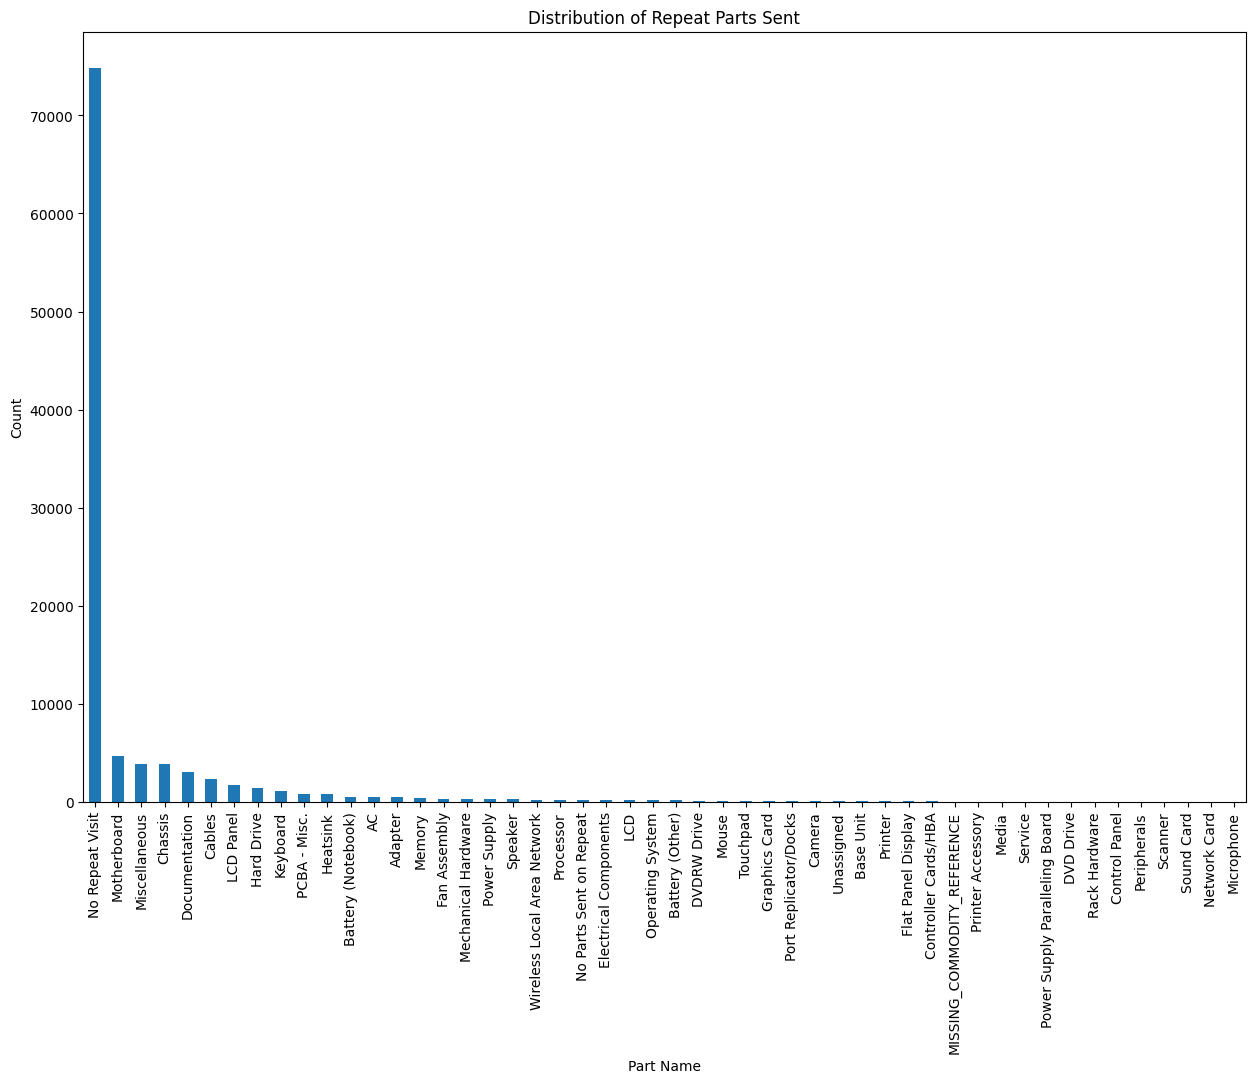

In [49]:
repeat_parts_df = df_repeat_parts_sent.groupby('part')['count'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 10))
repeat_parts_df.plot(kind='bar')
plt.title('Distribution of Repeat Parts Sent')
plt.ylabel('Count')
plt.xlabel('Part Name')
plt.show()

In [50]:
# Joining these processed dataframes back to the original dataframe.
df = df.join(df_parts_sent.rename(columns={'part': 'sent_part', 'count': 'sent_count'}))
df = df.join(df_repeat_parts_sent.rename(columns={'part': 'repeat_sent_part', 'count': 'repeat_sent_count'}))




In [51]:

# Defining bins
bins = [0, 300, 600, 900, 1200, 2000, np.inf]
labels = ["0-300 days", "300-600 days", "600-900 days", "900-1200 days", "1200-2000 days", "2000+ days"]

df['tenure_bins'] = pd.cut(df['agent_tenure_indays'], bins=bins, labels=labels, right=False)

bin_counts_new = df['tenure_bins'].value_counts().sort_index()
bin_counts_new


tenure_bins
0-300 days         8794
300-600 days      38461
600-900 days      44474
900-1200 days     36142
1200-2000 days    13103
2000+ days        12745
Name: count, dtype: int64

### Anomalies and outliers

No repeated contact but additional parts sent on visit

In [52]:
# Checking if the discrepancies are more common in a particular region.
region_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['region'].value_counts()
print(region_anomalies)


region
Hogwarts        14843
Middle Earth     4153
Milky Way        1352
Name: count, dtype: int64


In [53]:
# Determining if certain product types have more discrepancies.
product_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['product_type'].value_counts()
print(product_anomalies)


product_type
Laptops              17952
Desktops              1630
Other Electronics      766
Name: count, dtype: int64


In [54]:
# Checking if there's a specific timeframe (like a particular manufacturing week) when these discrepancies occurred more.
mnfcture_wk_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['mnfture_wk'].value_counts()
print(mnfcture_wk_anomalies)


mnfture_wk
201520    734
201630    384
201523    315
201639    308
201519    298
         ... 
201918      1
201403      1
201538      1
201218      1
201238      1
Name: count, Length: 270, dtype: int64


In [55]:
# Checking if discrepancies are more common with a particular mode of contact.
contact_type_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent']!= 'No Repeat Visit')]['contact_type'].value_counts()
print(contact_type_anomalies)


contact_type
VOICE      16573
CHAT        3092
EMAIL        662
UNKNOWN       21
Name: count, dtype: int64


In [56]:
# Determining if certain issues or topics are associated with more discrepancies.
issue_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['issue_type'].value_counts()
print(issue_anomalies)



issue_type
Unknown                                             6424
System Board Components                             4592
Audio, Video, Speakers, TV Tuner                    2215
Power Subsystem / Cables / AC Adapter               1598
Hard Drive                                          1482
Mechanical Chassis / Rack                           1178
Input Device / Webcam                               1118
Battery / CMOS                                       576
Networking Hardware NICs / Switches                  192
Memory / Processor                                   182
Imaging Device                                       162
Backplane                                             90
Contract or Service Issue                             83
Controller / Controller Card                          76
Dell Mobile / Wireless Devices                        54
Customer Confirmed CID                                39
Optical Drive/Media Card Reader                       37
CFA, MFA (Customer o

In [57]:

topic_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'] != 'No Repeat Visit')]['topic_category'].value_counts()
print(topic_anomalies)

topic_category
Booting                         11220
LCD/Monitor                      1699
Call Logs                         893
Physical Damage                   890
Hard Drive                        756
Keyboard                          690
Battery                           610
System Performance                543
Internet/Wireless                 408
Shutdown                          395
Touchpad                          297
Other                             280
Motherboard                       218
Audio Device                      177
General Queries                   160
Docking                           115
Fan                               102
System Warning                     92
Power                              89
USB                                86
OS                                 79
Webcam                             71
AC Adaptor                         58
Mouse                              51
CD/DVD Drive                       47
Memory                             

In [58]:
# Analyzing if newer or more experienced agents have more discrepancies.
agent_tenure_anomalies = df[(df['repeat_ct'] == 0) & (df['repeat_parts_sent']!= 'No Repeat Visit')]['tenure_bins'].value_counts()  
# Using bins for the tenure days for better representation
print(agent_tenure_anomalies)


tenure_bins
900-1200 days     8077
600-900 days      4292
300-600 days      4088
2000+ days        1546
1200-2000 days    1442
0-300 days         903
Name: count, dtype: int64


#### Insights

In [59]:
# Creating data backup before transformation 
original_df = df
#df = original_df

In [60]:
# Converting week numbers to date-time objects using pandas
df['mnfture_wk'] = pd.to_datetime(df['mnfture_wk'].astype(str) + '0', format='%Y%U%w', errors='coerce')
df['contract_st'] = pd.to_datetime(df['contract_st'].astype(str) + '0', format='%Y%U%w', errors='coerce')
df['contract_end'] = pd.to_datetime(df['contract_end'].astype(str) + '0', format='%Y%U%w', errors='coerce')
df['contact_wk'] = pd.to_datetime(df['contact_wk'].astype(str) + '0', format='%Y%U%w', errors='coerce')

# Displaying the head of df to confirm the changes
df.head()




,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,...,contact_manager_flg,diagnostics,repeat_parts_sent,region,country,sent_part,sent_count,repeat_sent_part,repeat_sent_count,tenure_bins
0,0,Laptops,2017-06-25,2017-06-25,2021-06-20,2018-10-07,VOICE,Unknown,Booting,"Hard Drive, Documentation(2)",...,0,Not_USED,No Repeat Visit,Hogwarts,Zonko's Joke Shop,Hard Drive,1,No Repeat Visit,1,900-1200 days
0,0,Laptops,2017-06-25,2017-06-25,2021-06-20,2018-10-07,VOICE,Unknown,Booting,"Hard Drive, Documentation(2)",...,0,Not_USED,No Repeat Visit,Hogwarts,Zonko's Joke Shop,Documentation,2,No Repeat Visit,1,900-1200 days
1,1,Laptops,2016-12-11,2016-12-11,2019-12-08,2018-10-07,VOICE,Unknown,Booting,"Speaker, Chassis",...,0,Not_USED,No Repeat Visit,Hogwarts,Zonko's Joke Shop,Speaker,1,No Repeat Visit,1,900-1200 days
1,1,Laptops,2016-12-11,2016-12-11,2019-12-08,2018-10-07,VOICE,Unknown,Booting,"Speaker, Chassis",...,0,Not_USED,No Repeat Visit,Hogwarts,Zonko's Joke Shop,Chassis,1,No Repeat Visit,1,900-1200 days
2,2,Laptops,2018-05-27,2018-05-27,2022-05-29,2018-10-07,VOICE,Unknown,Booting,Cables,...,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop,Cables,1,Motherboard,1,900-1200 days


#### Most frequently sent part

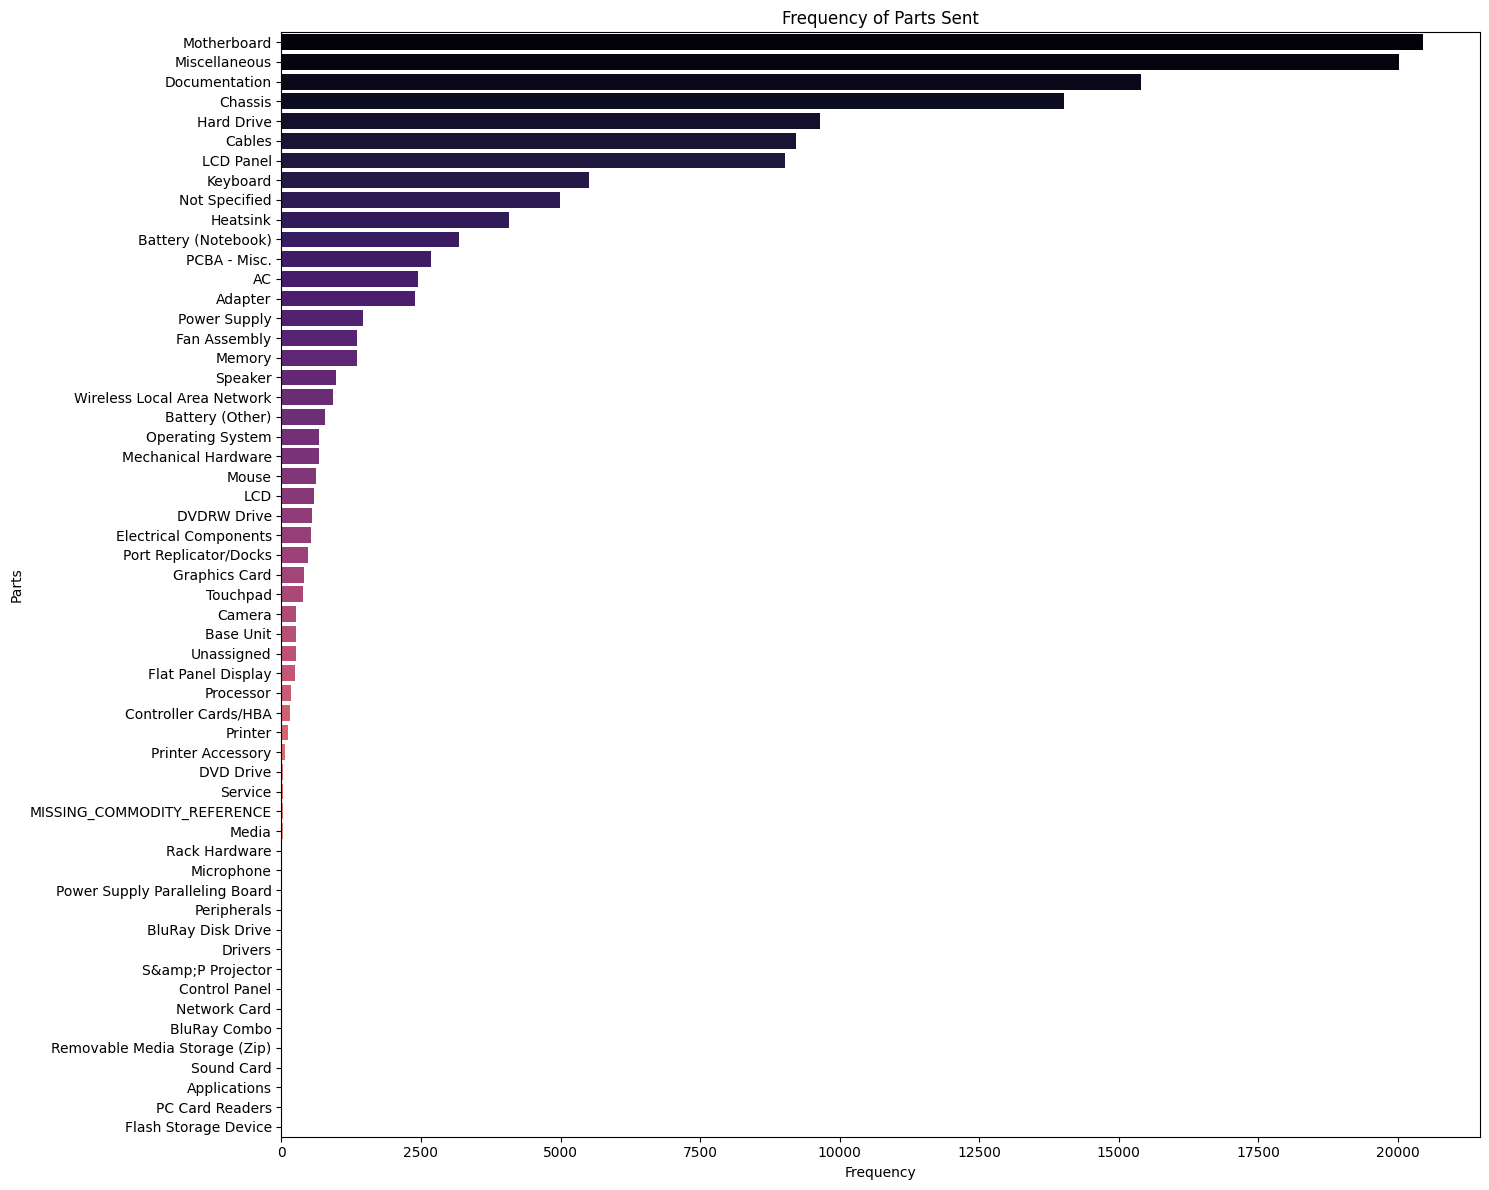

In [64]:

# Calculating the frequency of each part and plotting
part_frequencies = df.groupby('sent_part')['sent_count'].sum().sort_values(ascending=False)
part_frequencies = part_frequencies.drop('No Parts Sent', errors='ignore')

plt.figure(figsize=(15, 12))
sns.barplot(x=part_frequencies.values, y=part_frequencies.index, palette="magma")
plt.xlabel('Frequency')
plt.ylabel('Parts')
plt.title('Frequency of Parts Sent')
plt.tight_layout()
plt.show()



- Inventory Management: Prioritize stock for frequently sent parts.
- Quality Control: Investigate high-frequency parts for potential manufacturing flaws.
- Cost Analysis: Budget for warranty repairs based on parts' frequency.
- Training: Equip support staff to handle common part replacements efficiently.
- Product Improvement: Redesign or improve components with high replacement rates.

#### Most frequently Repeat Part Sent

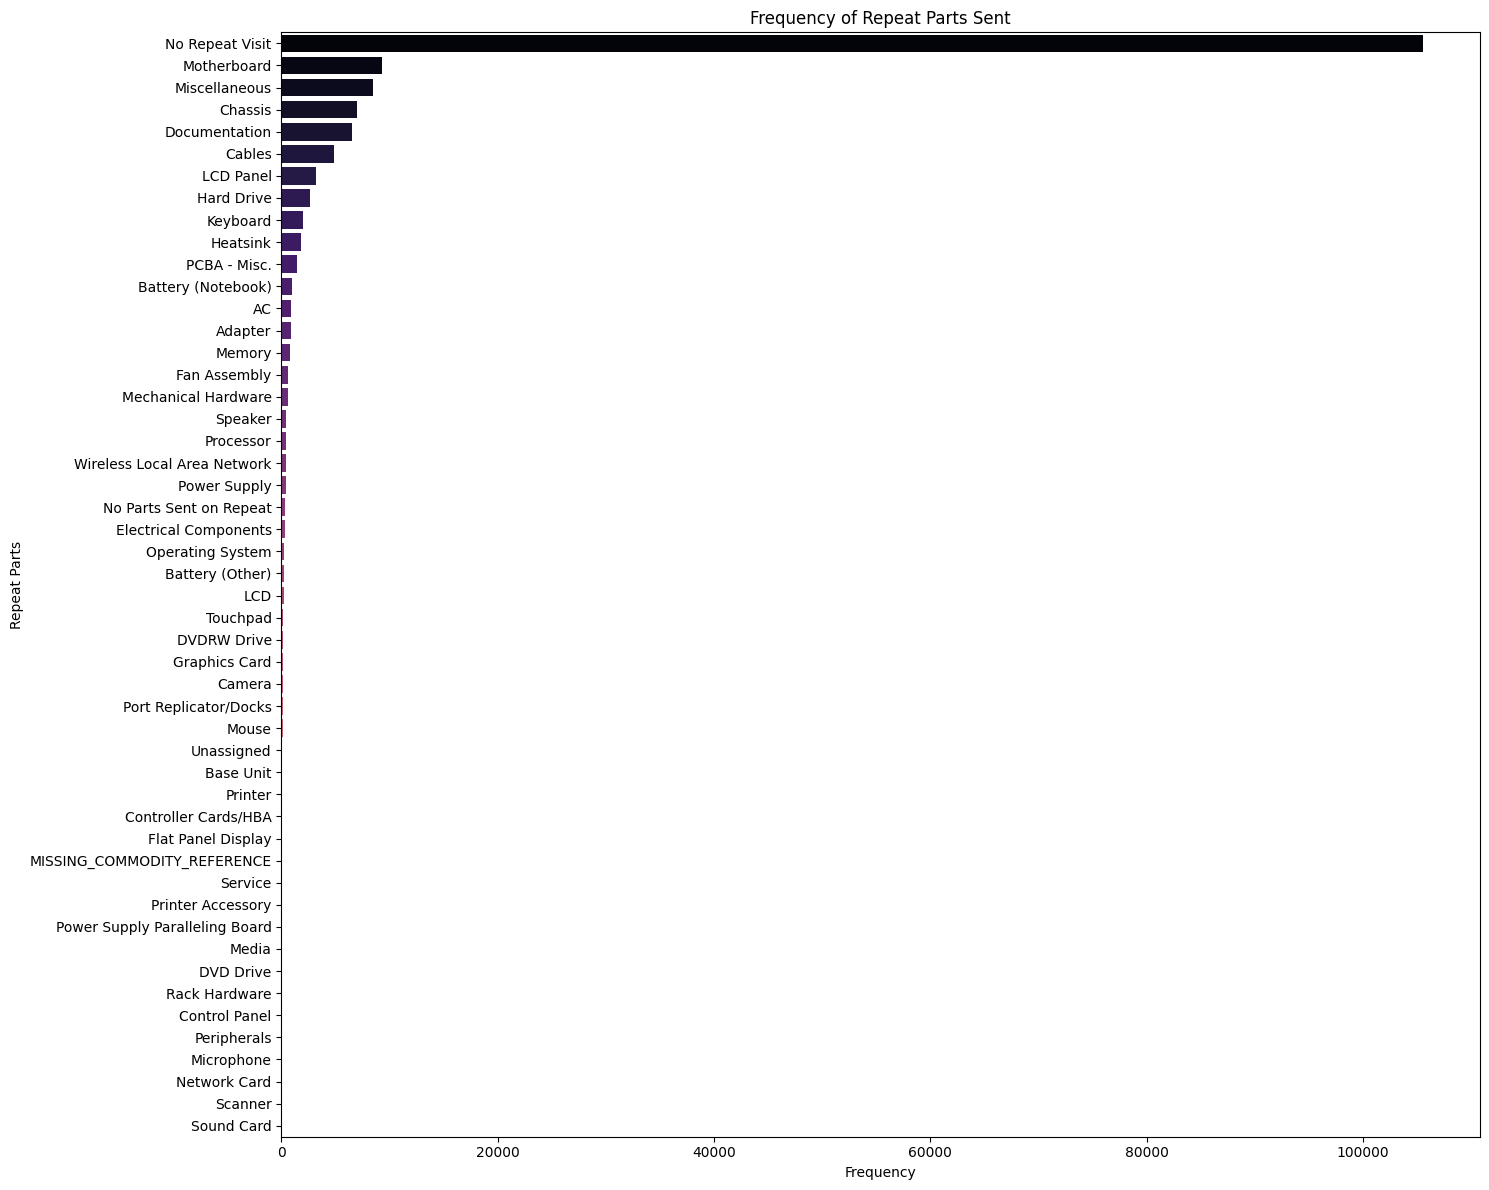

In [66]:
# Calculating the frequency of repeat parts sent
repeat_part_frequencies = df.groupby('repeat_sent_part')['repeat_sent_count'].sum().sort_values(ascending=False)

# Removing 'No Parts Sent' entry
repeat_part_frequencies = repeat_part_frequencies.drop('No Parts Sent', errors='ignore')

# Plotting using Seaborn
plt.figure(figsize=(15, 12))
sns.barplot(x=repeat_part_frequencies.values, y=repeat_part_frequencies.index, palette="magma")
plt.xlabel('Frequency')
plt.ylabel('Repeat Parts')
plt.title('Frequency of Repeat Parts Sent')
plt.tight_layout()
plt.show()


- Quality Concerns: High frequency in repeat parts indicates potential quality or compatibility issues. A part that's replaced multiple times for the same asset suggests it may not be resolving the underlying issue.
- Operational Efficiency: Multiple replacements can increase operational costs. Efficiently addressing issues the first time can reduce these costs.
- Customer Experience: Multiple replacements can lead to customer dissatisfaction. Ensuring a one-time, effective solution enhances customer trust.
- Training: If certain parts are repeatedly sent but not resolving issues, support staff might need more training or better diagnostics tools.
- Product Feedback Loop: High repeat replacements can be fed back into the product development cycle for design improvements.

#### For each product type, the most frequently sent parts

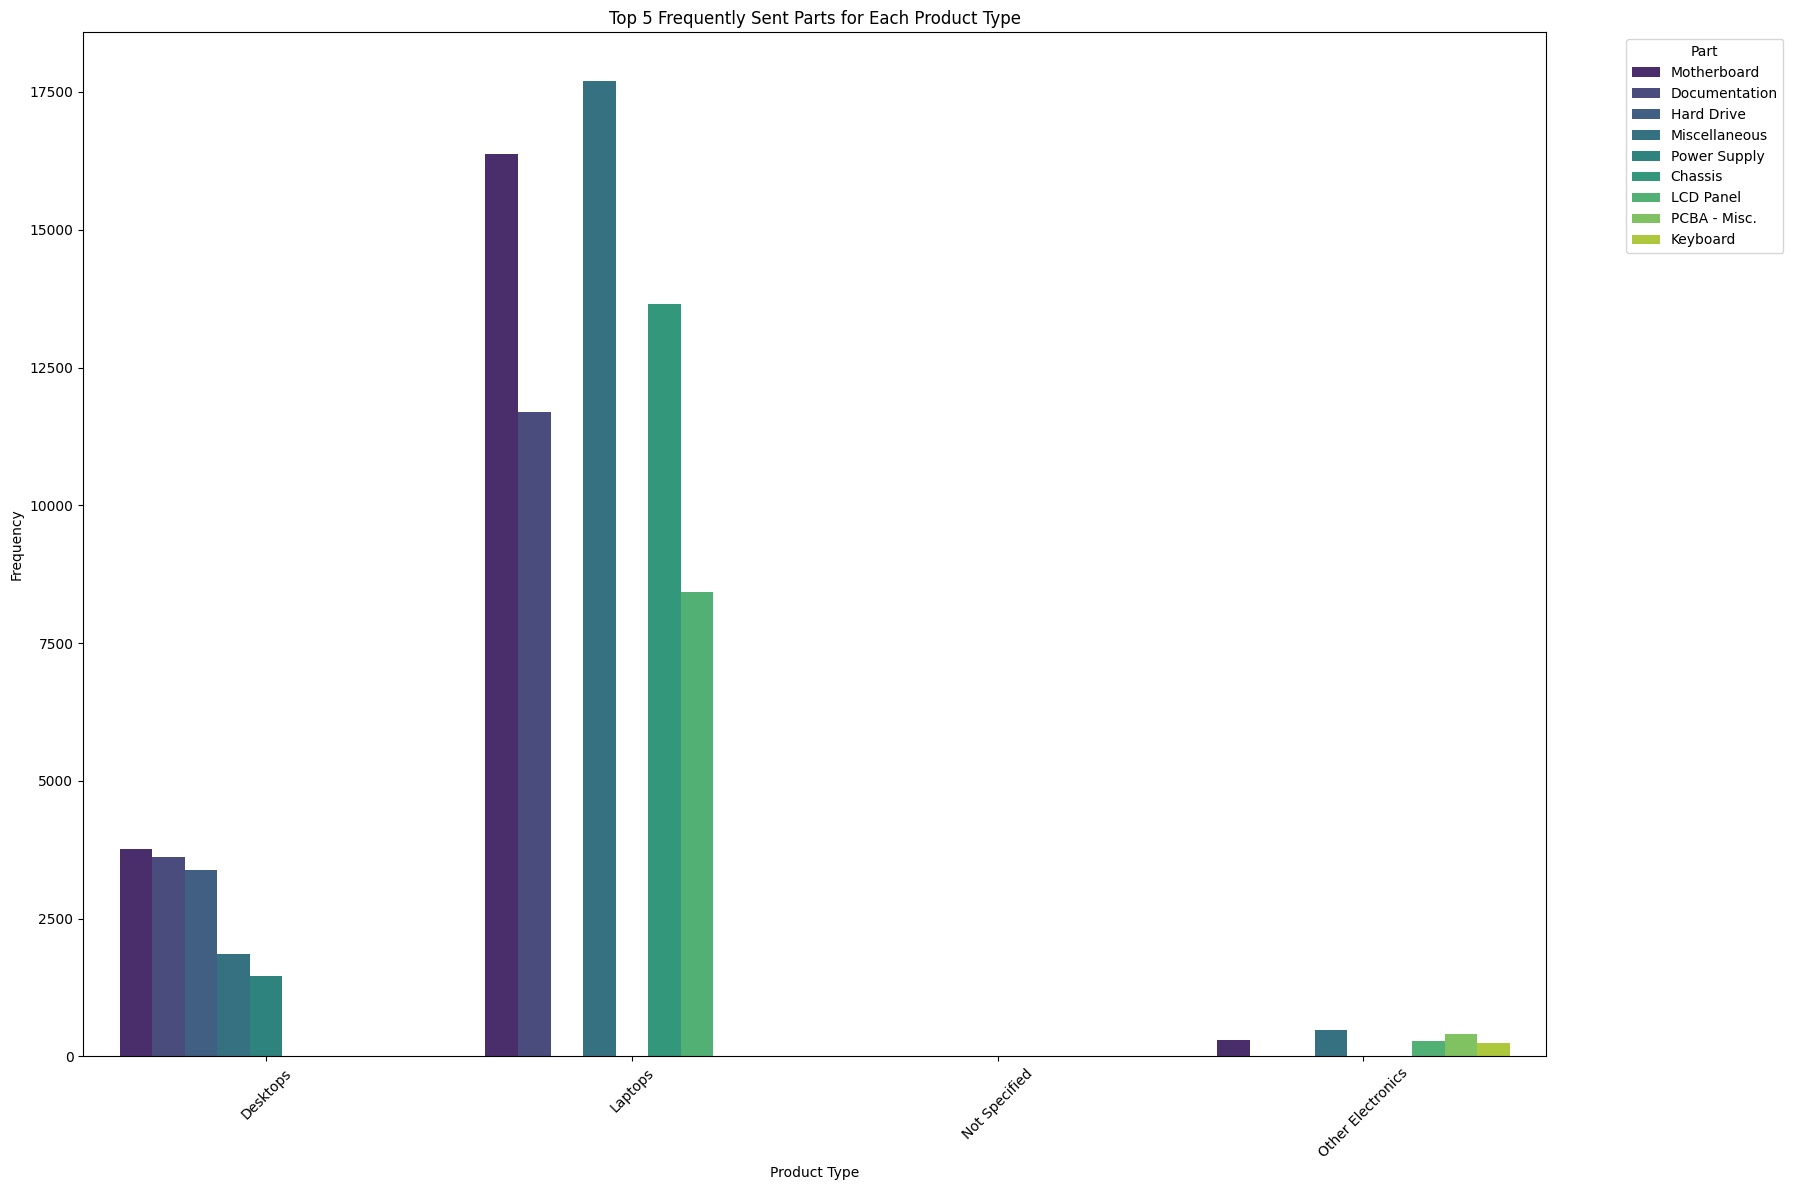

In [67]:
# Analysis with product_type for original parts:

# Filtering out the 'No Parts Sent' rows
filtered_df = df[df['sent_part'] != 'No Parts Sent']

# Grouping by product type and part
product_part_group = filtered_df.groupby(['product_type', 'sent_part'])['sent_count'].sum().reset_index()

# Getting the top parts for each product type
top_parts_per_product = product_part_group.groupby('product_type').apply(lambda x: x.nlargest(5, 'sent_count')).reset_index(drop=True)

#print(top_parts_per_product.sort_values('sent_count', ascending = False))
# Plotting 
plt.figure(figsize=(18, 12))
sns.barplot(data=top_parts_per_product, x='product_type', y='sent_count', hue='sent_part', dodge=True, palette='viridis')
plt.title('Top 5 Frequently Sent Parts for Each Product Type')
plt.ylabel('Frequency')
plt.xlabel('Product Type')
plt.xticks(rotation=45)
plt.legend(title='Part', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [68]:
print(top_parts_per_product.sort_values('sent_count', ascending = False))

         product_type      sent_part  sent_count
5             Laptops  Miscellaneous       17697
6             Laptops    Motherboard       16375
7             Laptops        Chassis       13657
8             Laptops  Documentation       11698
9             Laptops      LCD Panel        8434
0            Desktops    Motherboard        3770
1            Desktops  Documentation        3618
2            Desktops     Hard Drive        3379
3            Desktops  Miscellaneous        1855
4            Desktops   Power Supply        1462
11  Other Electronics  Miscellaneous         471
12  Other Electronics   PCBA - Misc.         398
13  Other Electronics    Motherboard         303
14  Other Electronics      LCD Panel         276
15  Other Electronics       Keyboard         251
10      Not Specified     Hard Drive           1


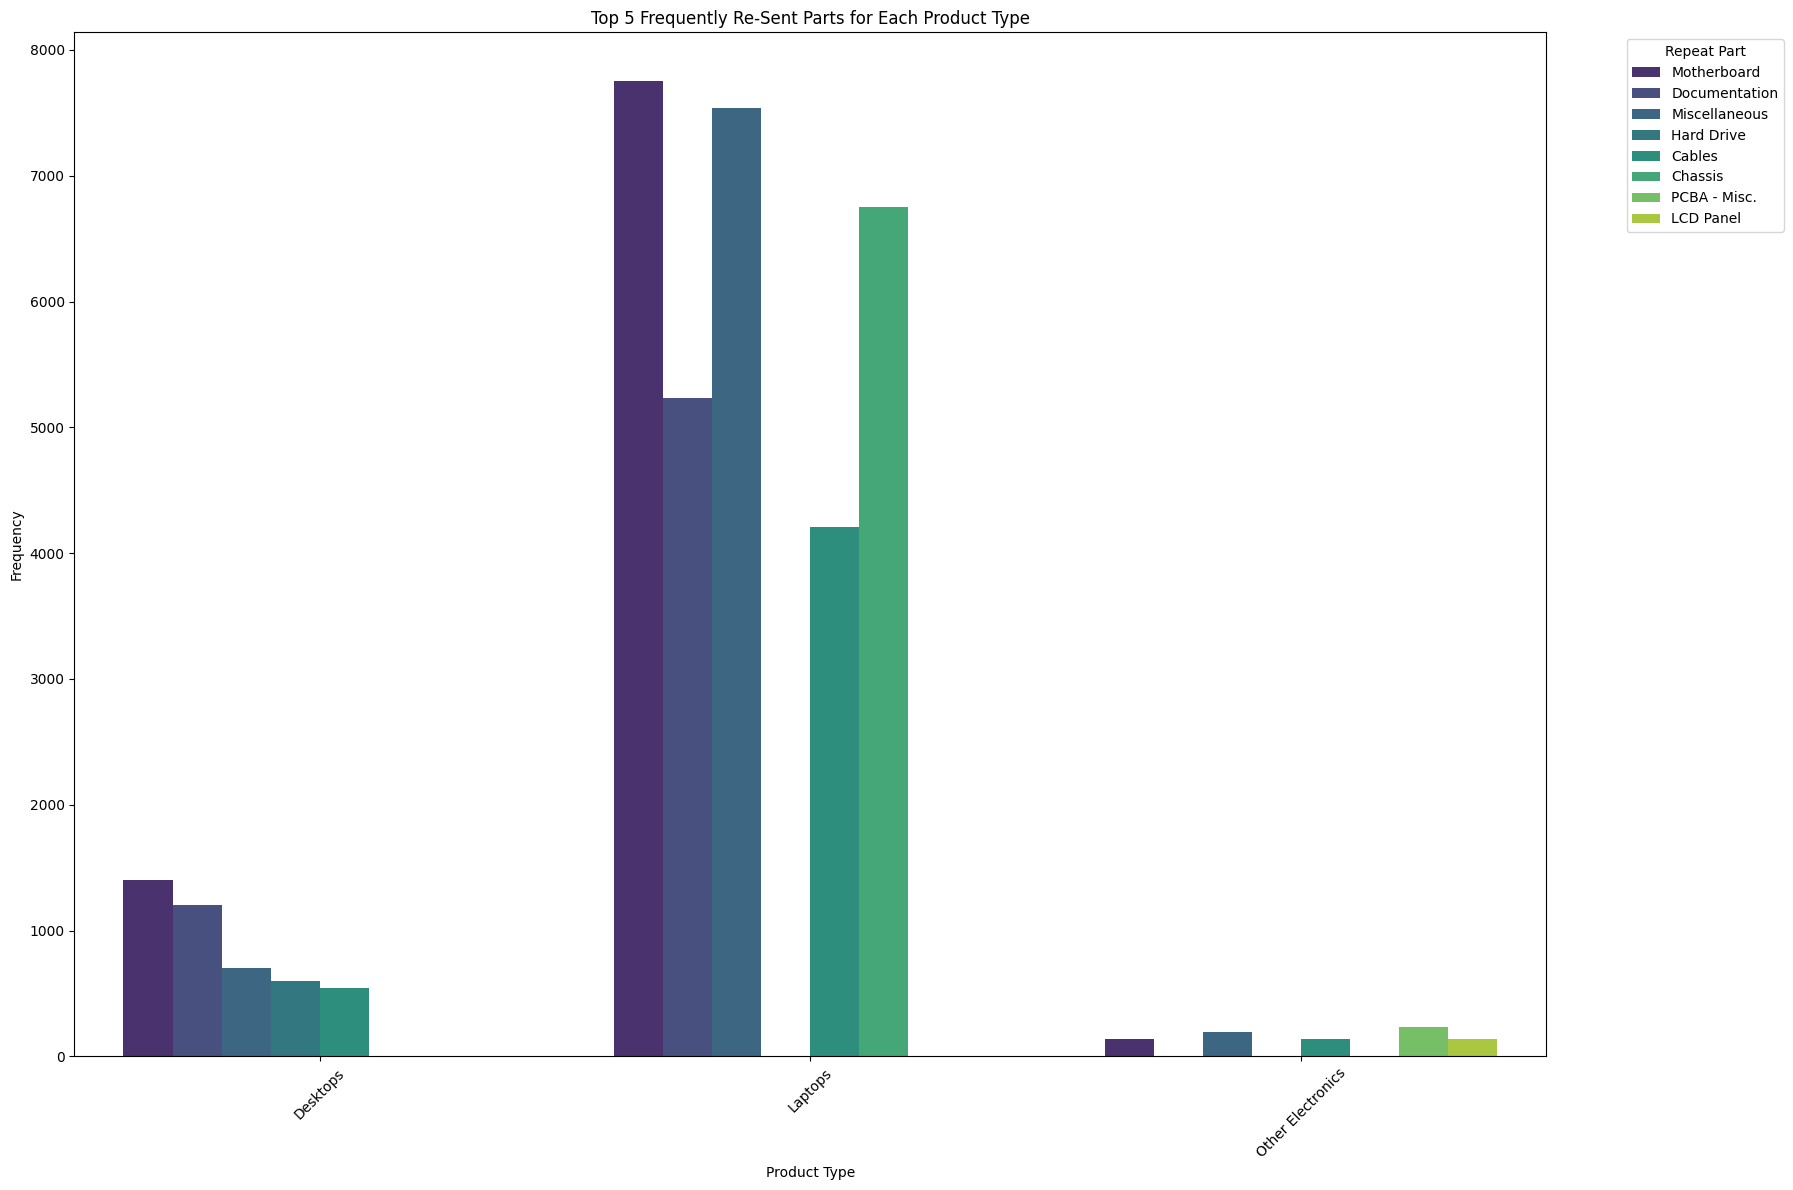

In [69]:

# Filtering out the unwanted rows
filtered_repeat_df = df[(df['repeat_sent_part'] != 'No Parts Sent on Repeat') & (df['repeat_sent_part'] != 'No Repeat Visit')]

# Grouping by product type and part
product_repeat_part_group = filtered_repeat_df.groupby(['product_type', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()

# Getting the top parts for each product type
top_repeat_parts_per_product = product_repeat_part_group.groupby('product_type').apply(lambda x: x.nlargest(5, 'repeat_sent_count')).reset_index(drop=True)

#print(top_repeat_parts_per_product.sort_values('repeat_sent_count', ascending = False))
# Plotting 
plt.figure(figsize=(18, 12))
sns.barplot(data=top_repeat_parts_per_product, x='product_type', y='repeat_sent_count', hue='repeat_sent_part', dodge=True, palette='viridis')
plt.title('Top 5 Frequently Re-Sent Parts for Each Product Type')
plt.ylabel('Frequency')
plt.xlabel('Product Type')
plt.xticks(rotation=45)
plt.legend(title='Repeat Part', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### For each issue type, the most frequently sent parts.

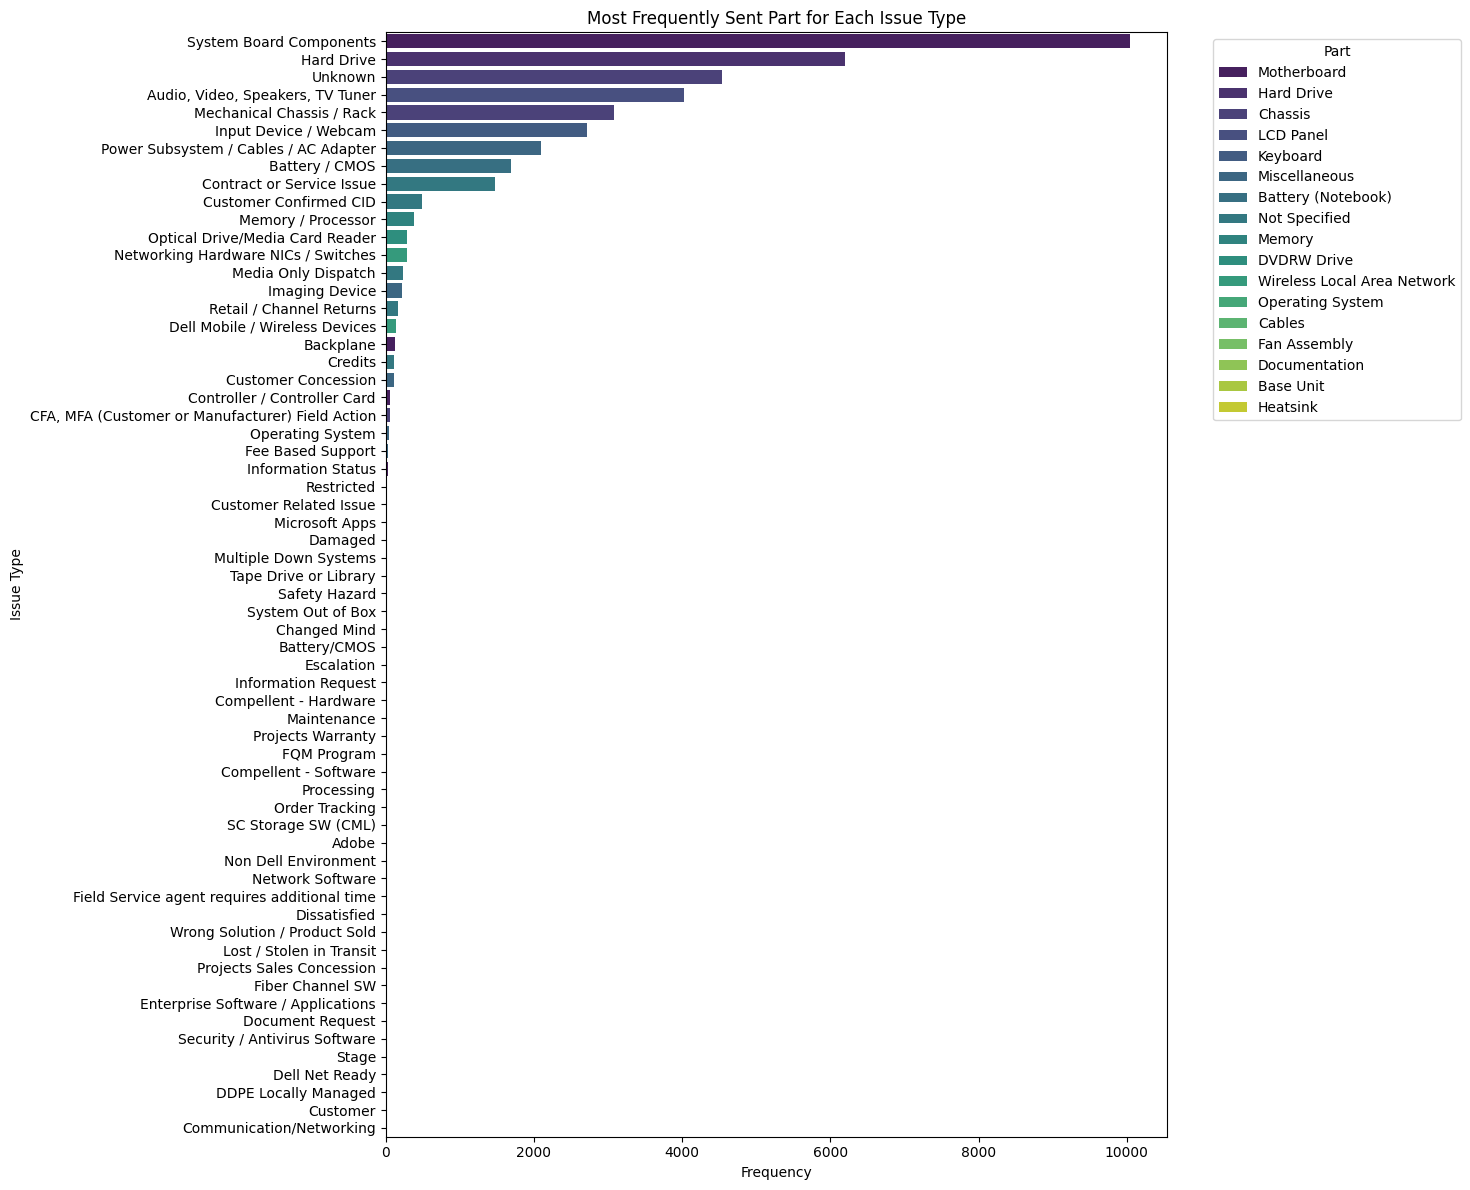

In [73]:
# Grouping by issue type and part
issue_part_group = filtered_df.groupby(['issue_type', 'sent_part'])['sent_count'].sum().reset_index()

# Getting the top part for each issue type
top_parts_per_issue = issue_part_group.groupby('issue_type').apply(lambda x: x.nlargest(1, 'sent_count')).reset_index(drop=True)

#print(top_parts_per_issue.sort_values('sent_count', ascending = False))
# Sorting the dataframe in descending order based on sent_count
top_parts_per_issue_sorted = top_parts_per_issue.sort_values(by='sent_count', ascending=False)

# Plotting the sorted data
plt.figure(figsize=(15, 12))
sns.barplot(data=top_parts_per_issue_sorted, y='issue_type', x='sent_count', hue='sent_part', dodge=False, palette='viridis')
plt.title('Most Frequently Sent Part for Each Issue Type')
plt.xlabel('Frequency')
plt.ylabel('Issue Type')
plt.legend(title='Part', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
# Grouping by issue type and part
issue_repeat_part_group = filtered_repeat_df.groupby(['issue_type', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()

# Getting the top repeated part for each issue type
top_repeat_parts_per_issue = issue_repeat_part_group.groupby('issue_type').apply(lambda x: x.nlargest(2, 'repeat_sent_count')).reset_index(drop=True)

#print(top_repeat_parts_per_issue)
print(top_repeat_parts_per_issue.to_string())


                                          issue_type    repeat_sent_part  repeat_sent_count
0                   Audio, Video, Speakers, TV Tuner       Miscellaneous               1252
1                   Audio, Video, Speakers, TV Tuner         Motherboard                898
2                                          Backplane         Motherboard                 56
3                                          Backplane       Miscellaneous                 55
4                                     Battery / CMOS         Motherboard                306
5                                     Battery / CMOS       Miscellaneous                249
6                                       Battery/CMOS       Documentation                  3
7                                       Battery/CMOS         Motherboard                  3
8   CFA, MFA (Customer or Manufacturer) Field Action       Documentation                 20
9   CFA, MFA (Customer or Manufacturer) Field Action          Hard Drive        

### For each topic category, the most frequently sent parts.

In [75]:
# Grouping by issue type and part
topic_part_group = filtered_df.groupby(['topic_category', 'sent_part'])['sent_count'].sum().reset_index()

# Getting the top part for each issue type
top_parts_per_topic= topic_part_group.groupby('topic_category').apply(lambda x: x.nlargest(1, 'sent_count')).reset_index(drop=True)

print(top_parts_per_topic.sort_values('sent_count', ascending = False))

                  topic_category                    sent_part  sent_count
8                        Booting                  Motherboard       12235
23                    Hard Drive                   Hard Drive        3648
29                   LCD/Monitor                    LCD Panel        3453
42               Physical Damage                      Chassis        2866
28                      Keyboard                     Keyboard        2406
5                        Battery           Battery (Notebook)        1595
11                     Call Logs                Not Specified        1071
54                      Touchpad                      Chassis         756
51            System Performance                Miscellaneous         682
21               General Queries                Not Specified         579
26             Internet/Wireless                Miscellaneous         554
47                      Shutdown                  Motherboard         528
35                   Motherboard      

In [77]:
# Grouping by issue type and part
topic_repeat_part_group = filtered_repeat_df.groupby(['topic_category', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()

# Getting the top repeated part for each issue type
top_repeat_parts_per_topic = topic_repeat_part_group.groupby('topic_category').apply(lambda x: x.nlargest(1, 'repeat_sent_count')).reset_index(drop=True)

print(top_repeat_parts_per_topic.to_string())

                  topic_category             repeat_sent_part  repeat_sent_count
0                     AC Adaptor                Miscellaneous                 50
1                      Antivirus                Miscellaneous                  4
2                   App/Software                Miscellaneous                 15
3                   Audio Device                Miscellaneous                112
4                           BIOS                Documentation                  6
5                        Battery                  Motherboard                346
6                     Bit Locker                Miscellaneous                  8
7                      Bluetooth  Wireless Local Area Network                  5
8                        Booting                  Motherboard               5051
9                   CD/DVD Drive                  DVDRW Drive                 28
10                           CPU                      Chassis                 15
11                     Call 

### Understanding if there are trends in parts being sent or resent based on regions or countries can provide insights into localized issues or supply chain disparities.

In [78]:
regional_parts_group = filtered_df.groupby(['region', 'sent_part'])['sent_count'].sum().reset_index()
top_parts_per_region = regional_parts_group.groupby('region').apply(lambda x: x.nlargest(5, 'sent_count')).reset_index(drop=True)
print(top_parts_per_region.sort_values('sent_count', ascending = False))


          region                    sent_part  sent_count
0       Hogwarts                Miscellaneous       19432
1       Hogwarts                  Motherboard       14087
2       Hogwarts                Documentation       10622
3       Hogwarts                      Chassis        9560
4       Hogwarts                   Hard Drive        6885
5   Middle Earth                  Motherboard        4177
6   Middle Earth                      Chassis        3713
7   Middle Earth                Documentation        2981
8   Middle Earth                Not Specified        2820
9   Middle Earth                       Cables        2519
10     Milky Way                  Motherboard        2184
11     Milky Way                Documentation        1793
12     Milky Way                       Cables         837
13     Milky Way                      Chassis         747
14     Milky Way                   Hard Drive         693
15       Unknown                     Keyboard           1
16       Unkno

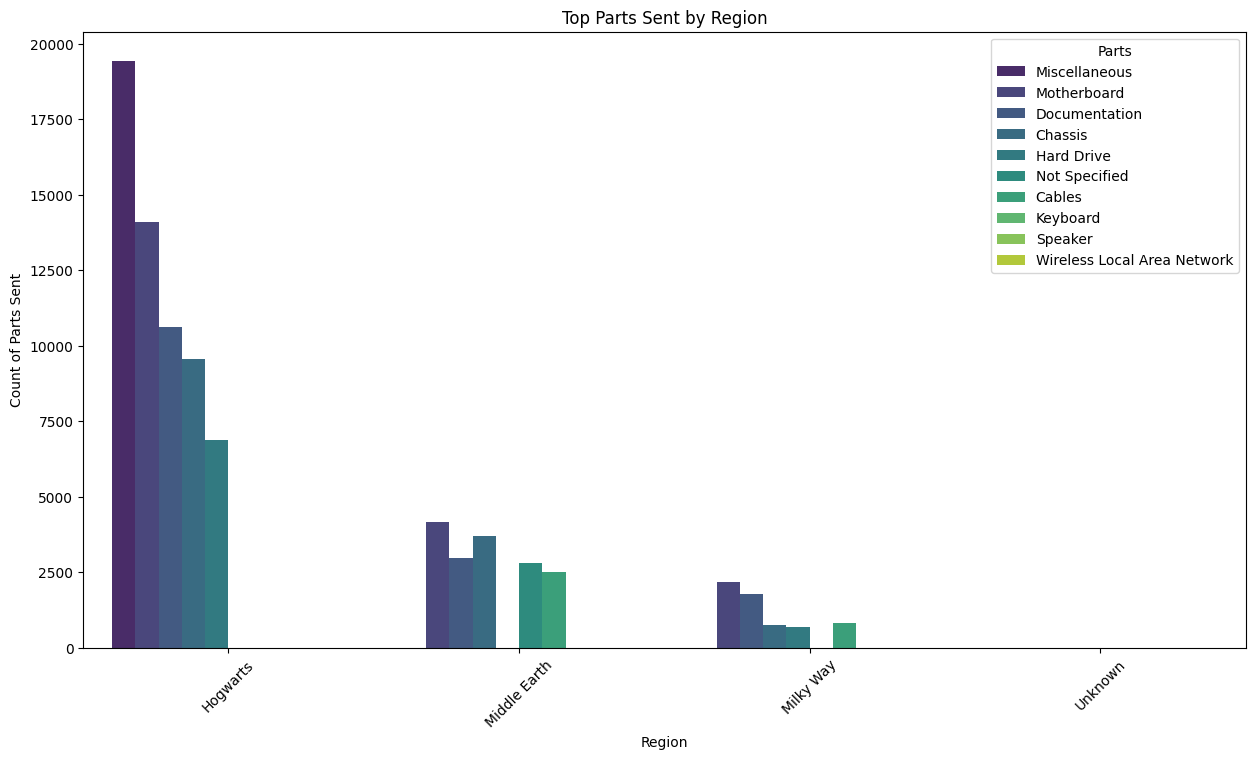

In [79]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top_parts_per_region, x='region', y='sent_count', hue='sent_part', palette='viridis')
plt.title('Top Parts Sent by Region')
plt.ylabel('Count of Parts Sent')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Parts', loc='upper right')

plt.show()

In [80]:
regional_repeat_parts_group = filtered_repeat_df.groupby(['region', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()
top_repeat_parts_per_region = regional_repeat_parts_group.groupby('region').apply(lambda x: x.nlargest(5, 'repeat_sent_count')).reset_index(drop=True)
print(top_repeat_parts_per_region.sort_values('repeat_sent_count', ascending = False))

          region repeat_sent_part  repeat_sent_count
0       Hogwarts    Miscellaneous               8138
1       Hogwarts      Motherboard               6042
2       Hogwarts          Chassis               5011
3       Hogwarts    Documentation               4074
4       Hogwarts           Cables               3204
5   Middle Earth      Motherboard               2414
6   Middle Earth    Documentation               1722
7   Middle Earth          Chassis               1622
8   Middle Earth           Cables               1320
10     Milky Way      Motherboard                842
9   Middle Earth        LCD Panel                761
11     Milky Way    Documentation                687
12     Milky Way           Cables                371
13     Milky Way          Chassis                319
14     Milky Way         Heatsink                261


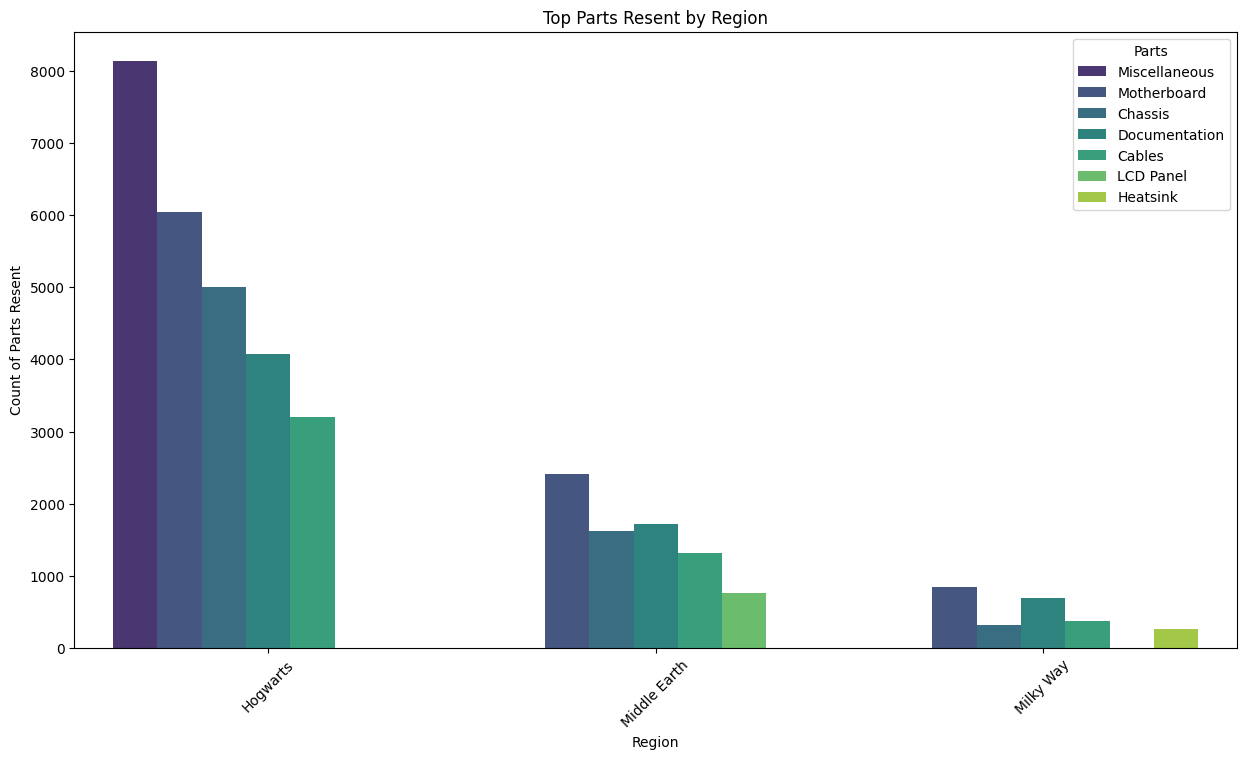

In [81]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top_repeat_parts_per_region, x='region', y='repeat_sent_count', hue='repeat_sent_part', palette='viridis')
plt.title('Top Parts Resent by Region')
plt.ylabel('Count of Parts Resent')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Parts', loc='upper right')

plt.show()

In [82]:
country_parts_group = filtered_df.groupby(['country', 'sent_part'])['sent_count'].sum().reset_index()
top_parts_per_country = country_parts_group.groupby('country').apply(lambda x: x.nlargest(1, 'sent_count')).reset_index(drop=True)
print(top_parts_per_country.sort_values('sent_count', ascending = False))


              country             sent_part  sent_count
48  Zonko's Joke Shop         Miscellaneous       19389
23             Lorien           Motherboard        3164
24             Merope           Motherboard        1927
28             Mordor               Chassis        1641
32             Pollux           Motherboard         138
44          The Shire                Cables          53
34          Ravenclaw         Miscellaneous          29
40    Shrieking Shack           Motherboard          23
33            Procyon           Motherboard          20
37              Rohan               Chassis          15
47               Vega           Motherboard          15
6              Becrux            Hard Drive          13
35            Regulus                Cables          12
31            Polaris                Cables          12
4             Antares                Cables          11
0               Acrux         Documentation           9
36              Rigel         Documentation     

In [547]:
country_repeat_parts_group = filtered_repeat_df.groupby(['country', 'repeat_sent_part'])['repeat_sent_count'].sum().reset_index()
top_repeat_parts_per_country = country_repeat_parts_group.groupby('country').apply(lambda x: x.nlargest(2, 'repeat_sent_count')).reset_index(drop=True)
print(top_repeat_parts_per_country.sort_values('repeat_sent_count', ascending = False))

              country       repeat_sent_part  repeat_sent_count
57  Zonko's Joke Shop          Miscellaneous               9344
58  Zonko's Joke Shop            Motherboard               6863
26             Lorien            Motherboard               2110
27             Lorien          Documentation               1386
28             Merope            Motherboard                857
30             Mordor                Chassis                829
29             Merope          Documentation                700
31             Mordor            Motherboard                609
36             Pollux            Motherboard                 53
52          The Shire            Motherboard                 46
53          The Shire          Documentation                 43
37             Pollux          Documentation                 36
55               Vega                Chassis                 27
50    Shrieking Shack                Chassis                 21
40          Ravenclaw          Miscellan

#### Checking if agent tenure has any impact on the parts being sent.

In [83]:
tenure_parts_group = filtered_df.groupby(['tenure_bins', 'sent_part'], observed=True)['sent_count'].sum().reset_index()
top_parts_per_tenure = tenure_parts_group.groupby('tenure_bins', observed=True).apply(lambda x: x.nlargest(3, 'sent_count')).reset_index(drop=True)

print(top_parts_per_tenure.sort_values('sent_count', ascending = False))


       tenure_bins      sent_part  sent_count
6     600-900 days  Miscellaneous        6914
9    900-1200 days        Chassis        5880
3     300-600 days  Miscellaneous        5854
7     600-900 days    Motherboard        5662
10   900-1200 days    Motherboard        5341
4     300-600 days    Motherboard        5203
8     600-900 days  Documentation        4080
5     300-600 days  Documentation        4004
11   900-1200 days  Documentation        3952
15      2000+ days  Miscellaneous        1753
16      2000+ days    Motherboard        1632
0       0-300 days  Miscellaneous        1563
17      2000+ days  Documentation        1380
12  1200-2000 days    Motherboard        1346
1       0-300 days    Motherboard        1264
13  1200-2000 days  Miscellaneous        1229
2       0-300 days  Documentation        1095
14  1200-2000 days  Documentation         885


In [84]:
tenure_repeat_parts_group = filtered_repeat_df.groupby(['tenure_bins', 'repeat_sent_part'], observed=True)['repeat_sent_count'].sum().reset_index()
top_repeat_parts_per_tenure = tenure_repeat_parts_group.groupby('tenure_bins', observed=True).apply(lambda x: x.nlargest(3, 'repeat_sent_count')).reset_index(drop=True)

print(top_repeat_parts_per_tenure.sort_values('repeat_sent_count', ascending = False))

       tenure_bins repeat_sent_part  repeat_sent_count
9    900-1200 days          Chassis               3110
6     600-900 days    Miscellaneous               2593
10   900-1200 days      Motherboard               2480
7     600-900 days      Motherboard               2422
3     300-600 days      Motherboard               2296
4     300-600 days    Miscellaneous               2293
11   900-1200 days    Miscellaneous               1809
5     300-600 days    Documentation               1805
8     600-900 days    Documentation               1685
15      2000+ days      Motherboard                794
12  1200-2000 days      Motherboard                703
0       0-300 days    Miscellaneous                651
16      2000+ days    Miscellaneous                647
17      2000+ days          Chassis                606
1       0-300 days      Motherboard                603
13  1200-2000 days    Documentation                468
14  1200-2000 days    Miscellaneous                448
2       0-

In [102]:
# The percentage of cases where a manager was brought in
manager_involved_percentage = (df['contact_manager_flg'].value_counts(normalize=True) * 100).get('Y', 0)

# The number and percentage of issues that required multiple visits
multiple_visits_count = df[df['repeat_ct'] > 0].shape[0]
multiple_visits_percentage = (multiple_visits_count / df.shape[0]) * 100

manager_involved_percentage, multiple_visits_count, multiple_visits_percentage


(0, 27838, 18.10966764030471)


- In the provided dataset, there were very few instances where a manager was brought in to assist, as indicated by the contact_manager_flg. Hence, the percentage is O%
0
- A total of 2783 issues required multiple visits to be resolved. This represents approximately 18.11% of the total issues.
- These insights indicate that while manager intervention is not commonly needed (based on the dataset), a significant portion of issues (nearly 1 in 5) requires multiple visits for resolution. This points to a potential area for service improvement, as multiple visits can increase costs and decrease customer satisfaction.

In [89]:
# Calculating the overall average time gap between manufacture and contact for parts sent
overall_avg_gap = filtered_df['weeks_since_mnfcture'].mean()
overall_avg_gap

83.4774230513216

#### Are there products that tend to have issues sooner after manufacturing?

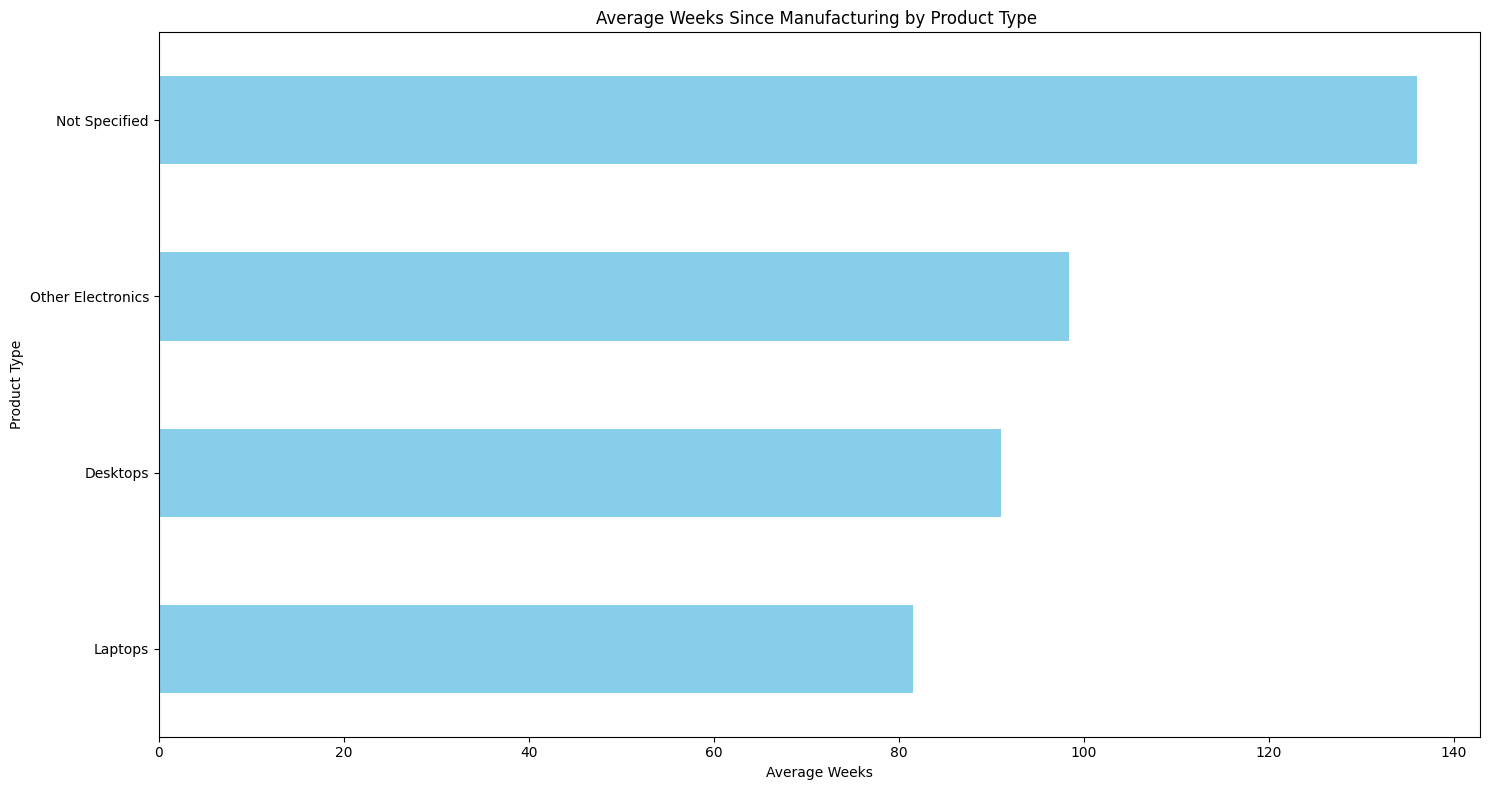

In [92]:
# Calculate the time difference (in weeks) for filtered_df
filtered_df['weeks_since_mnfcture'] = (filtered_df['contact_wk'] - filtered_df['mnfture_wk']).dt.days/7

# Group by product type and calculate the average weeks since manufacturing for filtered_df
avg_weeks_since_mnfcture_filtered = filtered_df.groupby('product_type')['weeks_since_mnfcture'].mean().sort_values()

# Plotting the results for filtered_df
plt.figure(figsize=(15, 8))
avg_weeks_since_mnfcture_filtered.plot(kind='barh', color='skyblue')
plt.title('Average Weeks Since Manufacturing by Product Type ')
plt.xlabel('Average Weeks')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()



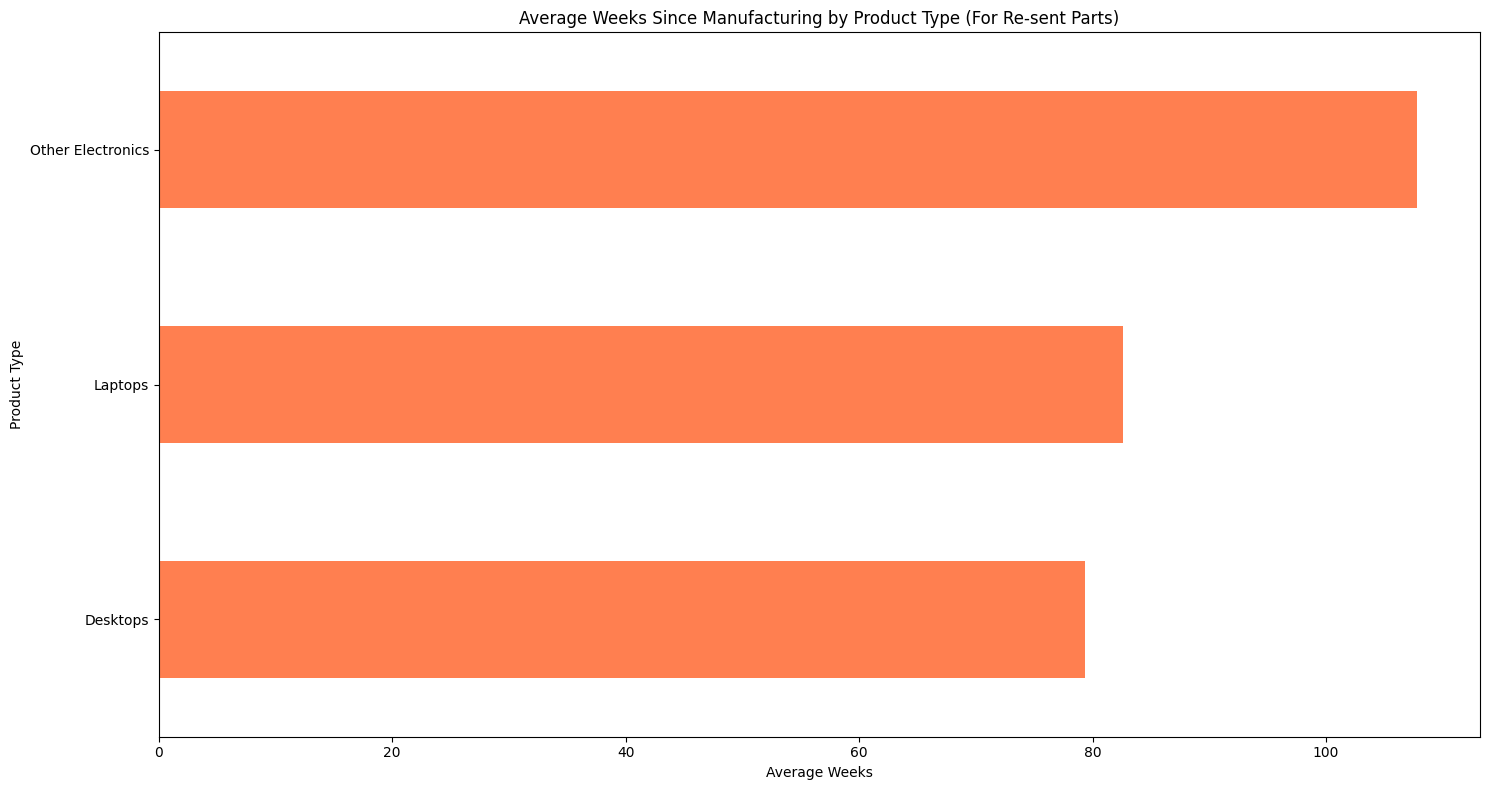

In [97]:
# Calculate the time difference (in weeks) for filtered_repeat_df
filtered_repeat_df['weeks_since_mnfcture'] = (filtered_repeat_df['contact_wk'] - filtered_repeat_df['mnfture_wk']).dt.days / 7

# Group by product type and calculate the average weeks since manufacturing for filtered_repeat_df
avg_weeks_since_mnfcture_repeat = filtered_repeat_df.groupby('product_type')['weeks_since_mnfcture'].mean().sort_values()

# Plotting the results for filtered_repeat_df
plt.figure(figsize=(15, 8))
avg_weeks_since_mnfcture_repeat.plot(kind='barh', color='coral')
plt.title('Average Weeks Since Manufacturing by Product Type (For Re-sent Parts)')
plt.xlabel('Average Weeks')
plt.ylabel('Product Type')
plt.tight_layout()
plt.show()


#### Are there specific batches (manufacture weeks) that have an unusually high number of issues?

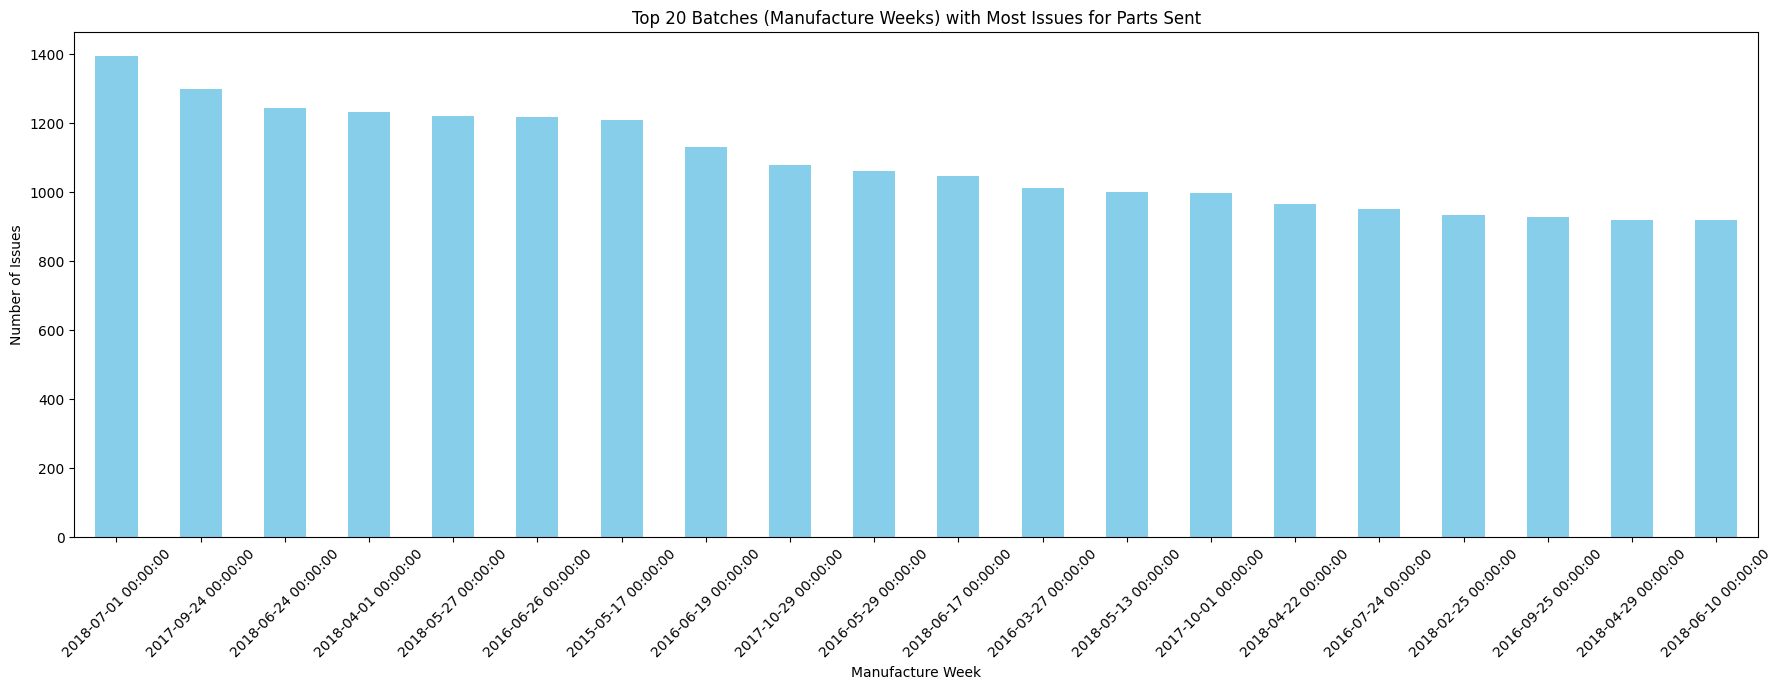

In [95]:
#Group by manufacture week and count of the issues
issues_per_batch = filtered_df.groupby('mnfture_wk')['asst_id'].count()

# Visualizing the batches with the most issues
plt.figure(figsize=(18, 7))
issues_per_batch.sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Batches (Manufacture Weeks) with Most Issues for Parts Sent')
plt.ylabel('Number of Issues')
plt.xlabel('Manufacture Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


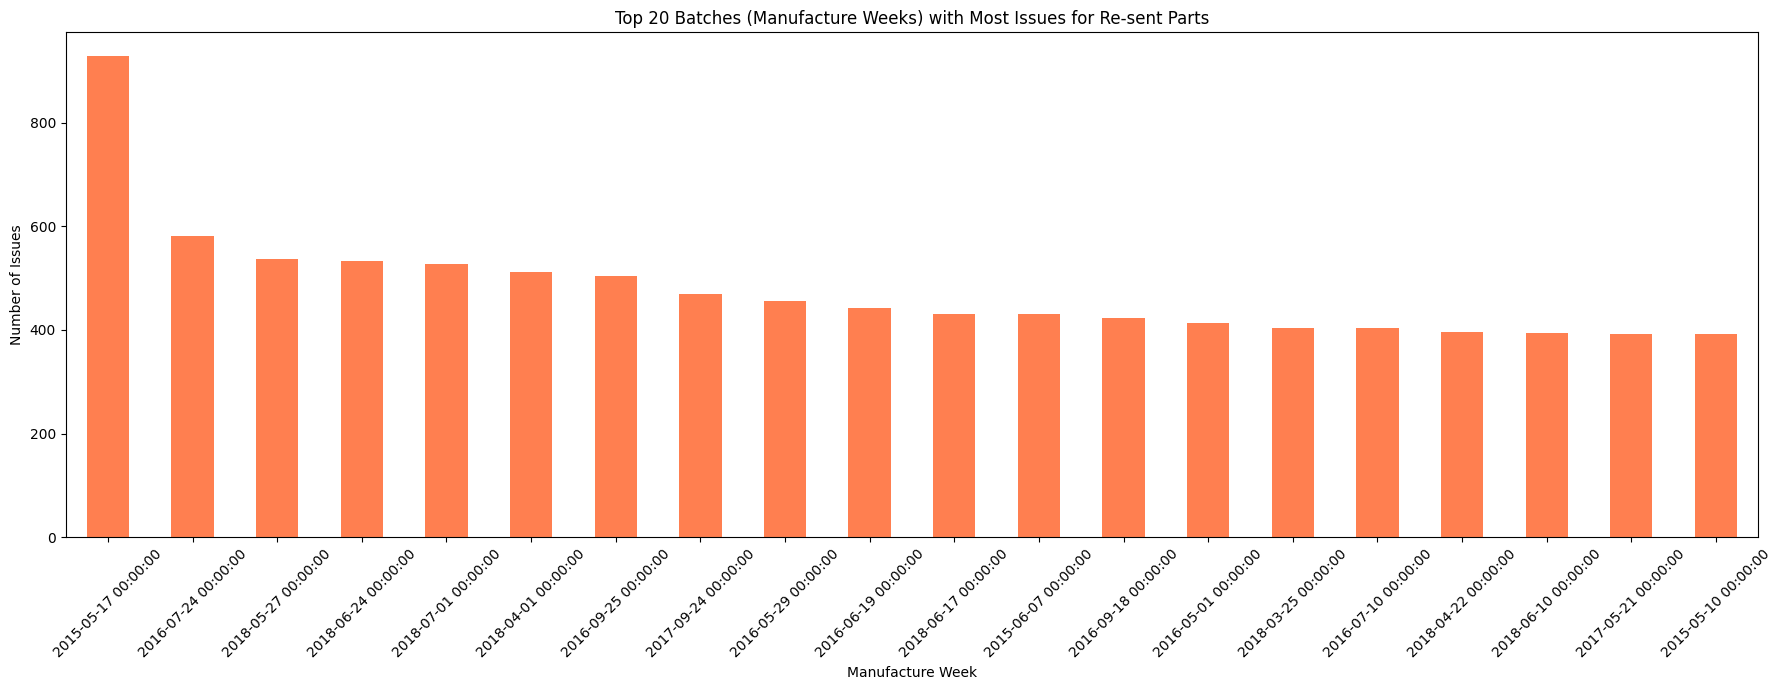

In [96]:
# For re-sent parts: 
repeat_issues_per_batch = filtered_repeat_df.groupby('mnfture_wk')['asst_id'].count()

# Visualizing the batches with the most issues requiring re-sent parts
plt.figure(figsize=(18, 7))
repeat_issues_per_batch.sort_values(ascending=False).head(20).plot(kind='bar', color='coral')
plt.title('Top 20 Batches (Manufacture Weeks) with Most Issues for Re-sent Parts')
plt.ylabel('Number of Issues')
plt.xlabel('Manufacture Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### How often do customers contact Dell after their warranty has expired?


In [570]:
filtered_df.loc[:,'contract_end_date'] = pd.to_datetime(filtered_df['contract_end'])

expired_warranty_contacts = filtered_df[filtered_df['contact_wk'] > filtered_df['contract_end_date']].shape[0]

print(f"Number of contacts after warranty expiration: {expired_warranty_contacts}")


Number of contacts after warranty expiration: 3398


In [98]:
# For parts sent cases where contact_wk is after contract_end
expired_warranty_contact = filtered_df[filtered_df['contact_wk'] > filtered_df['contract_end']]
percentage_expired_warranty_contact = (len(expired_warranty_contact) / len(filtered_df)) * 100

# For re-sent parts cases where contact_wk is after contract_end
expired_warranty_contact_repeat = filtered_repeat_df[filtered_repeat_df['contact_wk'] > filtered_repeat_df['contract_end']]
percentage_expired_warranty_contact_repeat = (len(expired_warranty_contact_repeat) / len(filtered_repeat_df)) * 100

percentage_expired_warranty_contact, percentage_expired_warranty_contact_repeat


(2.4889832579223645, 1.059871226691195)

In [99]:
# For parts sent: Break down by product type
product_expired_warranty_contact = expired_warranty_contact['product_type'].value_counts() / filtered_df['product_type'].value_counts()
product_expired_warranty_contact = product_expired_warranty_contact.fillna(0) * 100  # Convert to percentage

# For re-sent parts: Break down by product type
product_expired_warranty_contact_repeat = expired_warranty_contact_repeat['product_type'].value_counts() / filtered_repeat_df['product_type'].value_counts()
product_expired_warranty_contact_repeat = product_expired_warranty_contact_repeat.fillna(0) * 100  # Convert to percentage

product_expired_warranty_contact, product_expired_warranty_contact_repeat


(product_type
 Desktops             2.852144
 Laptops              2.456919
 Not Specified        0.000000
 Other Electronics    1.203163
 Name: count, dtype: float64,
 product_type
 Laptops              1.097136
 Desktops             1.001939
 Other Electronics    0.084818
 Name: count, dtype: float64)

#### Return Rates Calculate the ratio of repeat parts sent to initial parts sent for each part type. This can give insights into which parts are most likely to be sent back or replaced.

In [100]:
# Filtering rows where the part sent was the same as the repeat part sent
same_parts_df = df[df['sent_part'] == df['repeat_sent_part']]

# Count of each part when it's sent initially
initial_parts_counts = df['sent_part'].value_counts()

# Count of each part when it's re-sent (and matches the initial sent part)
repeat_parts_counts = same_parts_df['repeat_sent_part'].value_counts()

# Calculate the ratio of repeat parts sent to initial parts sent
return_rates = (repeat_parts_counts / initial_parts_counts).dropna().sort_values(ascending=False)

return_rates


Microphone                     0.125000
Printer                        0.119266
Motherboard                    0.113078
Miscellaneous                  0.105159
Documentation                  0.103453
Service                        0.090909
Chassis                        0.088590
PCBA - Misc.                   0.079835
Heatsink                       0.077232
LCD Panel                      0.076411
LCD                            0.074074
Graphics Card                  0.070707
Mouse                          0.070376
Cables                         0.068970
Touchpad                       0.068571
Unassigned                     0.067194
Rack Hardware                  0.062500
Port Replicator/Docks          0.062222
Wireless Local Area Network    0.061622
Controller Cards/HBA           0.060000
Hard Drive                     0.057212
Printer Accessory              0.057143
Electrical Components          0.056701
Keyboard                       0.054995
Base Unit                      0.050584


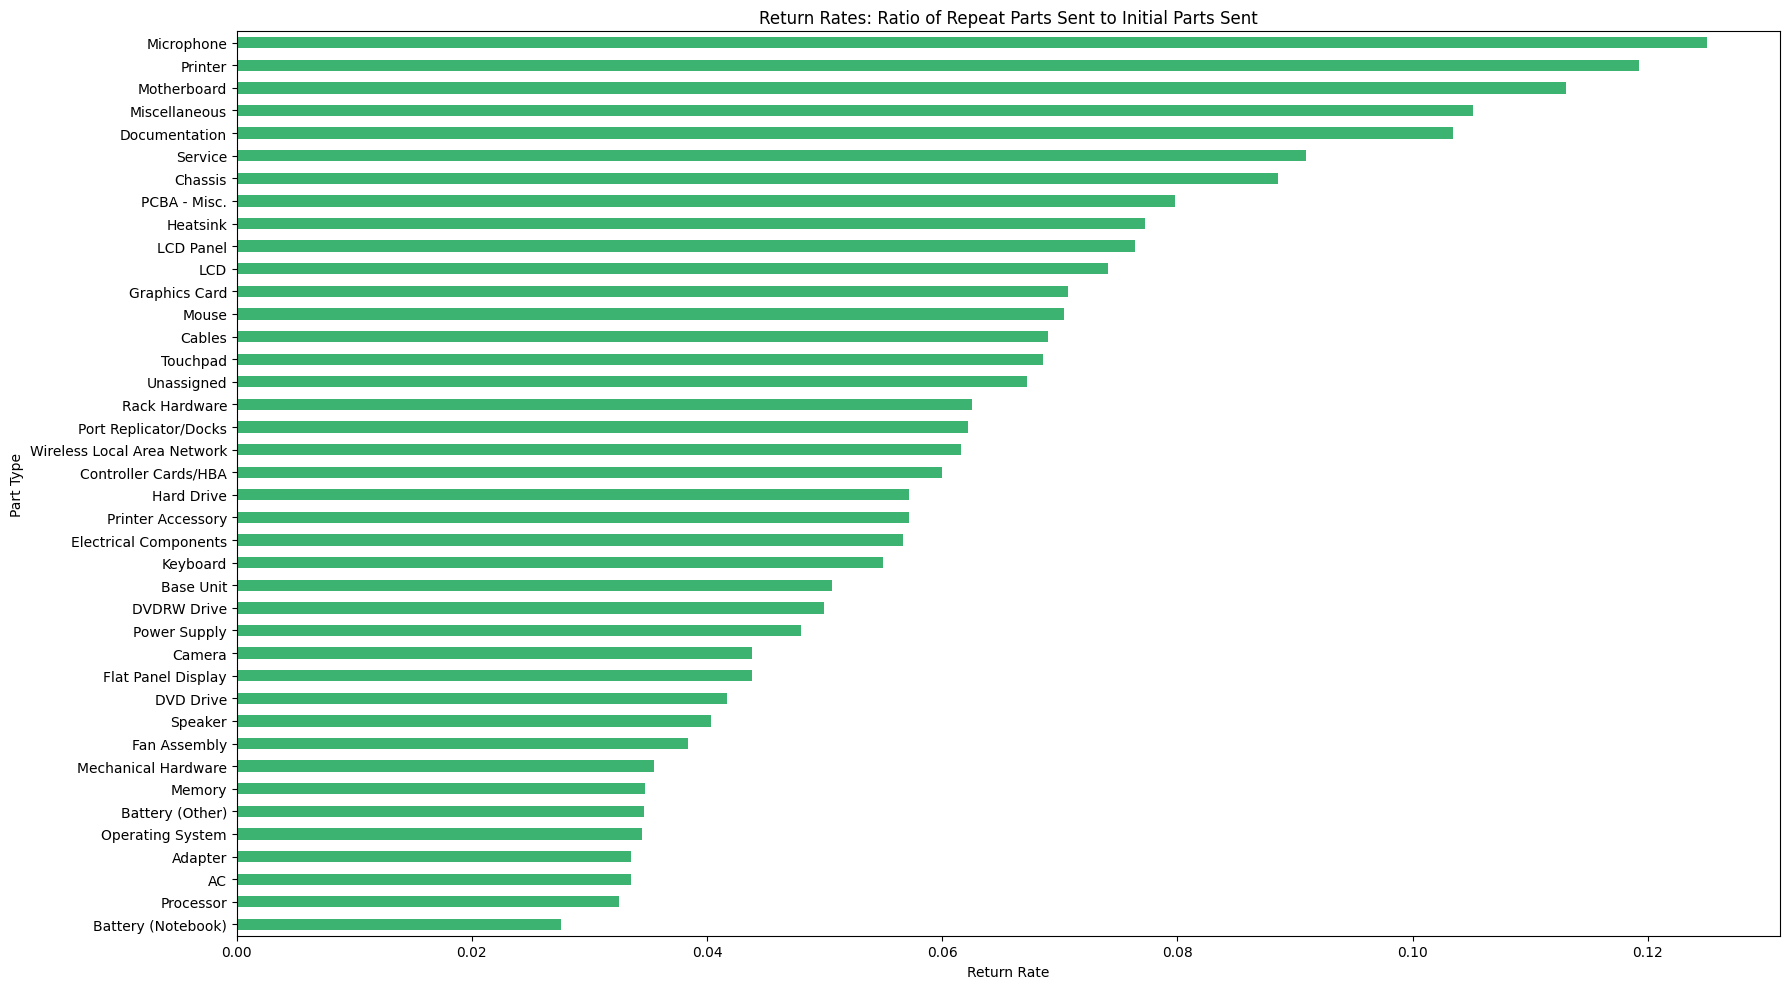

In [101]:
# Visualizing the return rates
plt.figure(figsize=(18, 10))
return_rates.plot(kind='barh', color='mediumseagreen')
plt.title('Return Rates: Ratio of Repeat Parts Sent to Initial Parts Sent')
plt.xlabel('Return Rate')
plt.ylabel('Part Type')
plt.gca().invert_yaxis()  # To have the part with the highest return rate on top
plt.tight_layout()
plt.show()
